# TMA4320 - Prosjekt 3 - Simulering av aksjonpotensialet med virrevandring av ioner
***
Prosjekt skrevet av William Scott Grundeland Olsen, Gruppe 6. Levert inn 09.04.2019.
***
Følgende kode gjør det mulig å nummerere likningene som brukes, og referere til dem.

In [1]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});
MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

For å gjøre det mer oversiktlig og letterer er moduler importert her, og noen globale konstanter er definert.

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import constants

In [3]:
e = constants.value("elementary charge")
k_B = constants.value("Boltzmann constant")
T = 273 + 37 # Kelvin, som gitt i oppgaven.
beta = 1 / (k_B * T)

## Oppgave 2
### Oppgave 2.1

Diffusjonslikningen for et stoff sin distribusjon $\phi(x,t)$ er i én dimensjon gitt som

\begin{equation}
\label{Diffusjonslikningen i 1D}
    \frac{\partial \phi(x,t)}{\partial t}=D\frac{\partial^2 \phi(x,t)}{\partial x^2},
\end{equation}

for en konstant $D$. Vi ønsker å vise at

\begin{equation}
\label{Phi som tilfredsstiller (1)}
    \tilde{\phi}(x,t)=\frac{1}{\sqrt{4\pi Dt}}\exp\left[-\frac{(x-\mu)^2}{4Dt}\right],
\end{equation}

oppfyller diffusjonslikningen \eqref{Diffusjonslikningen i 1D}. Vi finner da at

\begin{equation}
\label{Partiell t}
    \frac{\partial \tilde{\phi}(x,t)}{\partial t}=\frac{(x-\mu)^2-2Dt}{8\sqrt{\pi}D^{3/2}t^{5/2}}\exp\left[-\frac{(x-\mu)^2}{4Dt}\right],
\end{equation}

og at

\begin{equation*}
    \frac{\partial \tilde{\phi}(x,t)}{\partial x}=\frac{\mu-x}{4Dt\sqrt{\pi Dt}}\exp\left[-\frac{(x-\mu)^2}{4Dt}\right]
\end{equation*}

Dermed blir også

\begin{equation}
\label{Partiell2 x}
    \frac{\partial^2 \tilde{\phi}(x,t)}{\partial^2 x}=\frac{(x-\mu)^2-2Dt}{8\sqrt{\pi}D^{5/2}t^{5/2}}\exp\left[-\frac{(x-\mu)^2}{4Dt}\right]=\frac{1}{D}\frac{\partial \tilde{\phi}(x,t)}{\partial t}.
\end{equation}

Vi ser at Likning \eqref{Partiell t} er lik Likning \eqref{Partiell2 x}, uten en konstant $D$, og dermed er diffusjonslikningen \eqref{Diffusjonslikningen i 1D} oppfylt for $\tilde \phi (x,t)$ gitt i Likning \eqref{Phi som tilfredsstiller (1)}.

### Oppgave 2.2
#### Oppgave 2.2.1

Gitt partikkeldistribusjonen $\phi(x,0)=\delta(x-x_0)$ ved starttidspunktet $t=0$. Dette kan representeres som

\begin{equation*}
    \phi(x,0)=\delta(x-x_0)=\frac{1}{2\pi}\int_{-\infty}^\infty \text{e}^{-\text{i}k(x-x_0)}\,\text{d}k.
\end{equation*}

Da gir diffusjonslikningen \eqref{Diffusjonslikningen i 1D} at

\begin{equation*}
\begin{split}
    \left.\frac{\partial\phi(x,t')}{\partial t'}\right|_{t'=0} & =D\frac{\partial^2\phi(x,0)}{\partial x^2}=D\frac{\partial^2\delta(x-x_0)}{\partial x^2}=D\frac{\partial^2}{\partial x^2}\left[\frac{1}{2\pi}\int_{-\infty}^\infty \text{e}^{-\text{i}k(x-x_0)}\,\text{d}k\right]=\frac{D}{2\pi}\int_{-\infty}^\infty\frac{\partial^2 \text{e}^{-\text{i}k(x-x_0)}}{\partial x^2}\,\text{d}k\\
    &=\frac{D}{2\pi}\int_{-\infty}^\infty (-\text{i}k)^2\text{e}^{-\text{i}k(x-x_0)}\,\text{d}k=-\frac{D}{2\pi}\int_{-\infty}^\infty k^2\text{e}^{-\text{i}k(x-x_0)}\,\text{d}k.
\end{split}
\end{equation*}

Ved at 

\begin{equation*}
    \frac{\partial^2\phi(x,t)}{\partial t^2}=D^2\frac{\partial^2 \phi(x,t)}{\partial^2 x}\left[\frac{\partial^2\phi(x,t)}{\partial x^2}\right],
\end{equation*}

og så videre for høyere deriverte kan vi se at generelt vil

\begin{equation*}
    \left.\frac{\partial^n\phi(x,t')}{\partial t'^n}\right|_{t'=0}=D^n\frac{\partial^{2n}\phi(x,0)}{\partial x^{2n}}=\frac{D^n}{2\pi}\int_{-\infty}^\infty (-\text{i}k)^{2n}\text{e}^{-\text{i}k(x-x_0)}\,\text{d}k=\frac{D^n}{2\pi}\int_{-\infty}^\infty (\text{i}k)^{2n}\text{e}^{-\text{i}k(x-x_0)}\,\text{d}k.
\end{equation*}

Ved Taylorekspansjon av $\phi(x,t)$ vil da

\begin{equation*}
\begin{split}
    \phi(x,t) & =\phi(x,0)+\sum_{n=1}^\infty\frac{t^n}{n!}\left.\frac{\partial^n\phi(x,t')}{\partial t'^n}\right|_{t'=0}
    =\sum_{n=0}^\infty\frac{t^n}{n!}\left.\frac{\partial^n\phi(x,t')}{\partial t'^n}\right|_{t'=0}
    =\sum_{n=0}^\infty\frac{t^n}{n!}\frac{D^n}{2\pi}\int_{-\infty}^\infty (\text{i}k)^{2n}\text{e}^{-\text{i}k(x-x_0)}\,\text{d}k\\
    & =\frac{1}{2\pi}\int_{-\infty}^\infty\text{e}^{-\text{i}k(x-x_0)}\sum_{n=0}^\infty\frac{(-Dk^2t)^n}{n!}\,\text{d}k
    =\frac{1}{2\pi}\int_{-\infty}^\infty\text{e}^{-\text{i}k(x-x_0)}\text{e}^{-Dtk^2}\,\text{d}k,
\end{split}
\end{equation*}

da vi kjenner den uendelige summen $\sum_{n=0}^\infty x^n/n!=\text{e}^x$.

Dette gir da ved integrasjon at

\begin{equation*}
    \phi(x,t)=\frac{1}{2\pi}\int_{-\infty}^\infty\text{e}^{-\text{i}k(x-x_0)}\text{e}^{-Dtk^2}\,\text{d}k
    =\frac{1}{2\pi}\int_{-\infty}^\infty\text{e}^{-\text{i}k(x-x_0)-Dtk^2}\,\text{d}k.
\end{equation*}

Det er kjent [1] at

\begin{equation}
\label{Rottmann}
    \int_{-\infty}^\infty\text{e}^{-(au^2+2bu+c)}\,\text{d}u=\sqrt{\frac{\pi}{a}}\exp\left[\frac{b^2-ac}{a}\right],
\end{equation}

gitt at $a>0$.

For å beregne $\phi(x,t)$ ser vi da at $a=Dt>0$, $b=\text{i}(x-x_0)/2$ og $c=0$. Dette gir

\begin{equation*}
    \phi(x,t)=\frac{1}{2\pi}\sqrt{\frac{\pi}{Dt}}\exp\left\lbrace\frac{[\text{i}(x-x_0)/2]^2}{Dt}\right\rbrace
    =\sqrt{\frac{\pi}{4\pi^2Dt}}\exp\left[-\frac{(x-x_0)^2}{4Dt}\right]
    =\frac{1}{\sqrt{4\pi Dt}}\exp\left[-\frac{(x-x_0)^2}{4Dt}\right],
\end{equation*}

som skulle vises.

#### Oppgave 2.2.2

En generell normalfordeling har sannsynlighetstetthet $f=f(x;\mu,\sigma^2)$ gitt ved

\begin{equation}
\label{Normalfordeling}
    f(x;\mu,\sigma^2)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp\left[-\frac{(x-\mu)^2}{2\sigma^2}\right],
\end{equation}

der $\mu$ er forventningsverdien og $\sigma^2$ er variansen til fodelingen.

Ved å sammenlikne dette med $\phi(x,t)$ er det klart at $\mu=x_0$ og $\sigma^2=2Dt$. Variansen er et mål på variasjonen i en fordeling, og for dette brukes også standardavviket $\sigma=\sqrt{2Dt}$. Dette måler spredningen av verdiene til en stokastisk variabel. Jo større $\sigma$ desto større spredning over tid. Altså ser vi at for større $D$ vil spredningen fra startpunktet bli større over tid enn for en mindre $D$. For større diffusjonskonstant $D$ vil også konsentrasjonsforskjellene utjevnes raskere fra startpunktet enn for en mindre $D$.

#### Oppgave 2.2.3

Vi definerer Fouriertransformasjonen av funksjonen $f(x)$ ved

\begin{equation*}
    \hat{f}(\omega)=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty}f(x)\text{e}^{-\text{i}\omega x}\,\text{d}x,
\end{equation*}

slik at den inverse Fouriertransformasjonen blir

\begin{equation*}
    f(x)=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty}\hat{f}(x)\text{e}^{\text{i}\omega x}\,\text{d}\omega.
\end{equation*}

Ved å ta Fouriertransformasjonen til diffusjonslikningen \eqref{Diffusjonslikningen i 1D} får vi da likningen

\begin{equation*}
    \frac{\partial\hat{\phi}(\omega, t)}{\partial t}=-D\omega^2\hat{\phi}(\omega, t).
\end{equation*}

Dette er en differensiallikning som er lett å løse, og den har løsningen

\begin{equation*}
    \hat{\phi}(\omega, t)=C(\omega)\text{e}^{-D\omega^2t}.
\end{equation*}

Initialbetingelsen $\phi(x,0)=g(x)$ gir ved den inverse Fouriertransformasjonen at

\begin{equation*}
    g(x)=\mathscr{F}^{-1}\left[\hat{\phi}(\omega,0)\right](x)=\mathscr{F}^{-1}\left[C(\omega)\right](x).
\end{equation*}

Følgelig ved å anvende Fouriertransformasjonen blir

\begin{equation*}
    C(\omega)=\mathscr{F}\left[g(x)\right](\omega)\equiv\hat{g}(\omega).
\end{equation*}

Dermed kan vi skrive løsningen av den Fouriertransformerte diffusjonslikningen som

\begin{equation*}
    \hat{\phi}(\omega, t)=\hat{g}(\omega)\text{e}^{-D\omega^2t}.
\end{equation*}

Vi ønsker dette skrevet på formen der det ikke er Fouriertransformert, og ved å bruke definisjonen av den inverse Fouriertransformasjonen som over blir

\begin{equation*}
    \phi(x, t)=\mathscr{F}^{-1}\left[\hat{g}(\omega)\text{e}^{-D\omega^2t}\right]
    =\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty}\hat{g}(\omega)\text{e}^{-D\omega^2t}\text{e}^{\text{i}\omega x}\,\text{d}\omega.
\end{equation*}

Ved å også bruke den inverse Fouriertransformasjonen til $\hat{g}(\omega)$ blir

\begin{equation*}
    \phi(x, t)=\frac{1}{2\pi}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}g(k)\text{e}^{-Dt\omega^2+\text{i}(x-k)\omega}\,\text{d}k\text{d}\omega.
\end{equation*}

Ved å bruke Likning \eqref{Rottmann} kan man løse integralet med hensyn på $\omega$, slik at

\begin{equation*}
    \phi(x, t)=\frac{1}{2\pi}\int_{-\infty}^{\infty}g(k)\sqrt{\frac{\pi}{Dt}}\exp\left[-\frac{(x-k)^2}{4Dt}\right]\,\text{d}k
    =\frac{1}{\sqrt{4\pi Dt}}\int_{-\infty}^{\infty}g(k)\exp\left[-\frac{(x-k)^2}{4Dt}\right]\,\text{d}k.
\end{equation*}

## Oppgave 3

<IPython.core.display.Javascript object>


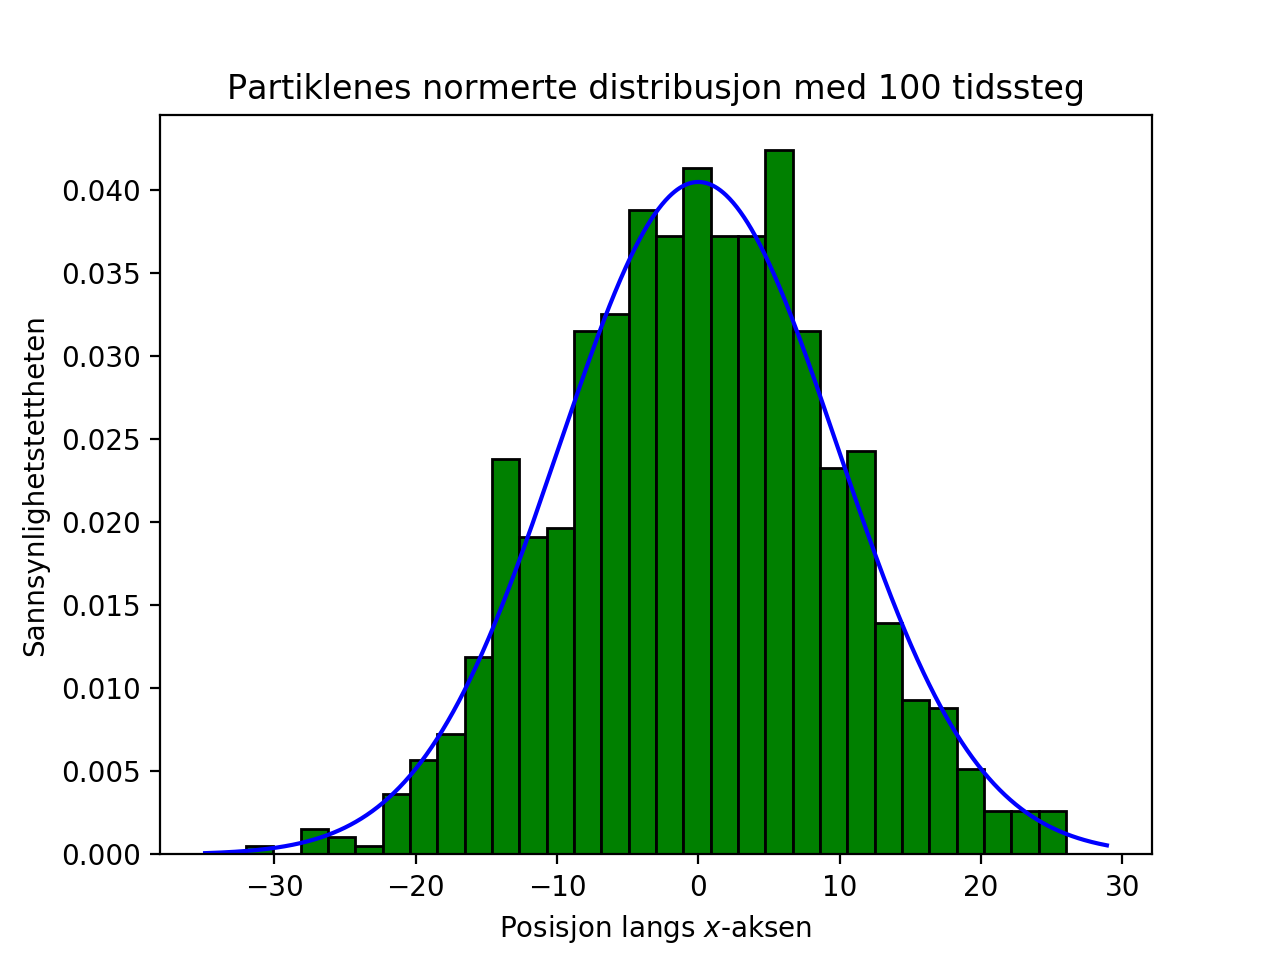

Forventningsverdi: -0.006
Standardavvik:	   9.847


In [4]:
def random_walk_in_1D(N=1000, steps=100, h=1):
    particles = np.zeros(N)
    for _ in range(steps):
        rand = np.random.uniform(size=N) # Liste med N tilfeldige tall
        for i in range(N):
            if rand[i] >= 0.5: # Partikkelen går til høyre
                particles[i] += h
            else: # Partikkelen går til venstre
                particles[i] -= h
    
    plt.figure("Random walk in 1D")
    plt.hist(particles, bins=30, color='g', edgecolor='k', density=True)
    mu, sigma = norm.fit(particles)
    x_max, x_min = plt.xlim()
    x = np.linspace(x_min, x_max, 1000)
    normal = norm.pdf(x, mu, sigma)
    plt.plot(x, normal, color='b')
    plt.title("Partiklenes normerte distribusjon med {} tidssteg".format(steps))
    plt.xlabel("Posisjon langs $x$-aksen")
    plt.ylabel("Sannsynlighetstettheten")
    plt.show()
    print("Forventningsverdi: {}\nStandardavvik:\t   {}".format(mu.round(3), sigma.round(3)))

random_walk_in_1D()

Figuren over viser de 1000 partiklenes distribusjon langs $x$-aksen på 100 tidssteg. En normalfordeling som i Likning \eqref{Normalfordeling} ble tilnærmet til histogramet. I denne fordelingen er forventningsverdien $\mu$ og standardavviket $\sigma$ gitt over, men dette vil varriere basert på forskjellige tilfeldige steg for partiklene.

Vi kan merke oss at siden antall tidssteg er et partall og vi slipper partiklene i origo vil sannsynligheten for at en partikkel ender på en $x$-verdi som er odd, være null. Altså vil posisjonen til partikkelen alltid være gitt ved $x=2m$, for $m\in\mathbb{Z}$. Fra dette følger det at normalfordelingen naturligvis ikke vil gi et nøyaktig resultat, da det ut fra denne vil være mulig å lande på alle verdiene innenfor kurven. Vi prøver å gå fra en diskret til en kontinuerlig fordeling og da vil det selvsagt være tap av nøyaktighet.

Ettersom det er et binært valg mellom at partikkelen enten går til høyre eller til venstre med sannsynlighet $P^+$ og $P^-$ henholdsvis, kan dette modelleres som et binomisk forsøk med $n$ steg. I grensen hvor $n\to\infty$, eller i dette tilfellet hvor $n$ er stor, så vil en binomisk fordeling tilnærmes en normalfordeling. Det er defor rimelig at normalfordelingen passer til plottet av histogramene som over.

## Oppgave 5

Jeg definerer først funksjonen som brukes i alle deloppgavene i oppgave 5. Denne tar inn et vilkårlig potensial, og brukes videre på potensialene i senere deloppgaver.

In [5]:
def random_walk_in_potential(potential, x, N=1000, steps=100, h=1):
    particles = np.zeros(N)
    for _ in range(steps):
        rand = np.random.uniform(size=N)
        for i in range(N):
            P_relative = np.exp(-beta * (potential(particles[i] - h, k, h) - potential(particles[i] + h, k, h)))
            P_minus = 1 - 1 / (1 + P_relative)
            if rand[i] >= P_minus:
                particles[i] += h
            else:
                particles[i] -= h
    return particles, steps

### Oppgave 5.1

Her definerers potensialet $V_1(x)=kx$, og det plottes under for verdier av $k$ slik at $\beta k\in \{0.2, 2, 5, 9\}$.

<IPython.core.display.Javascript object>


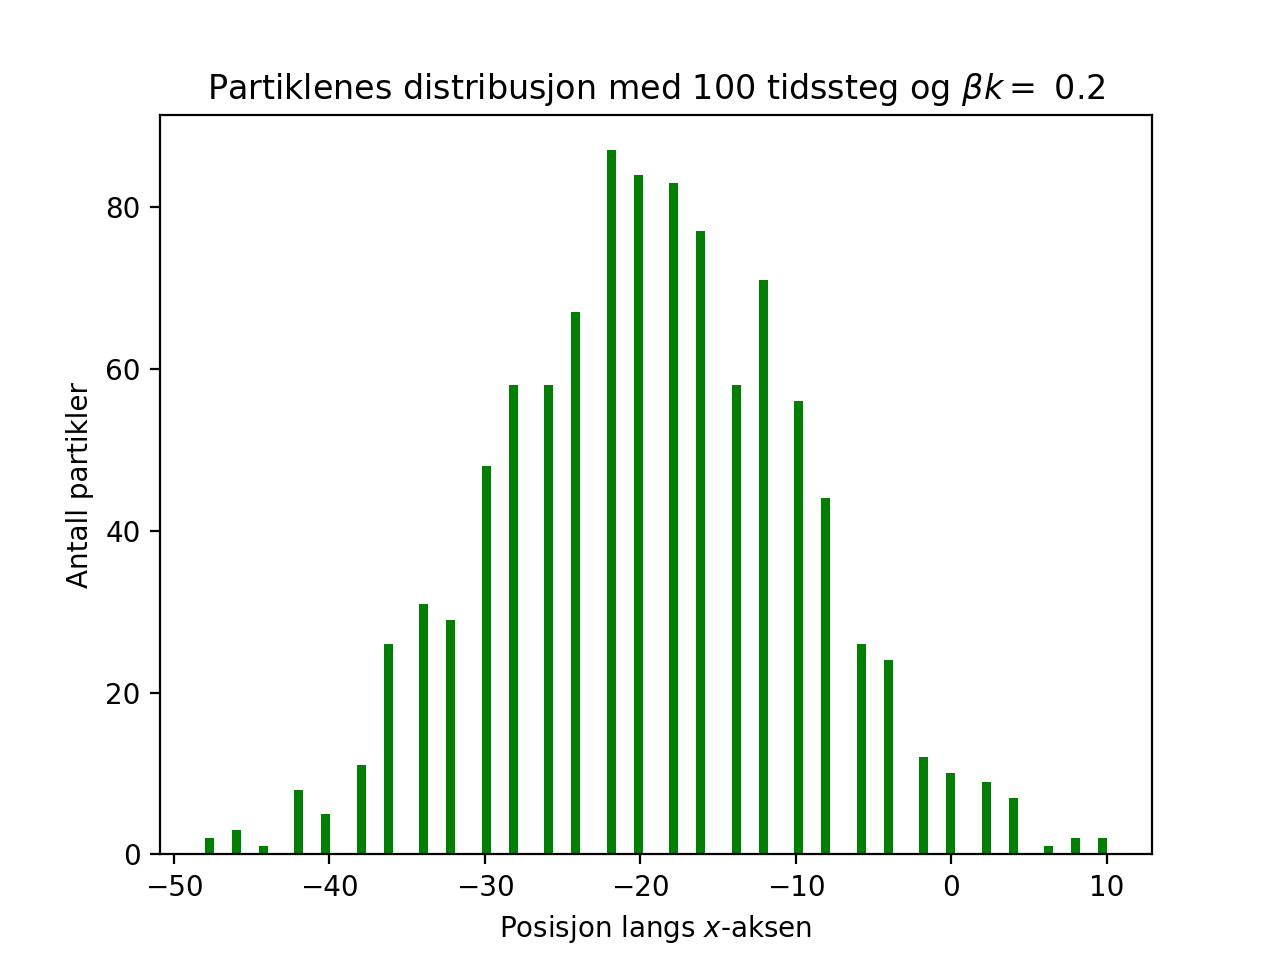

<IPython.core.display.Javascript object>


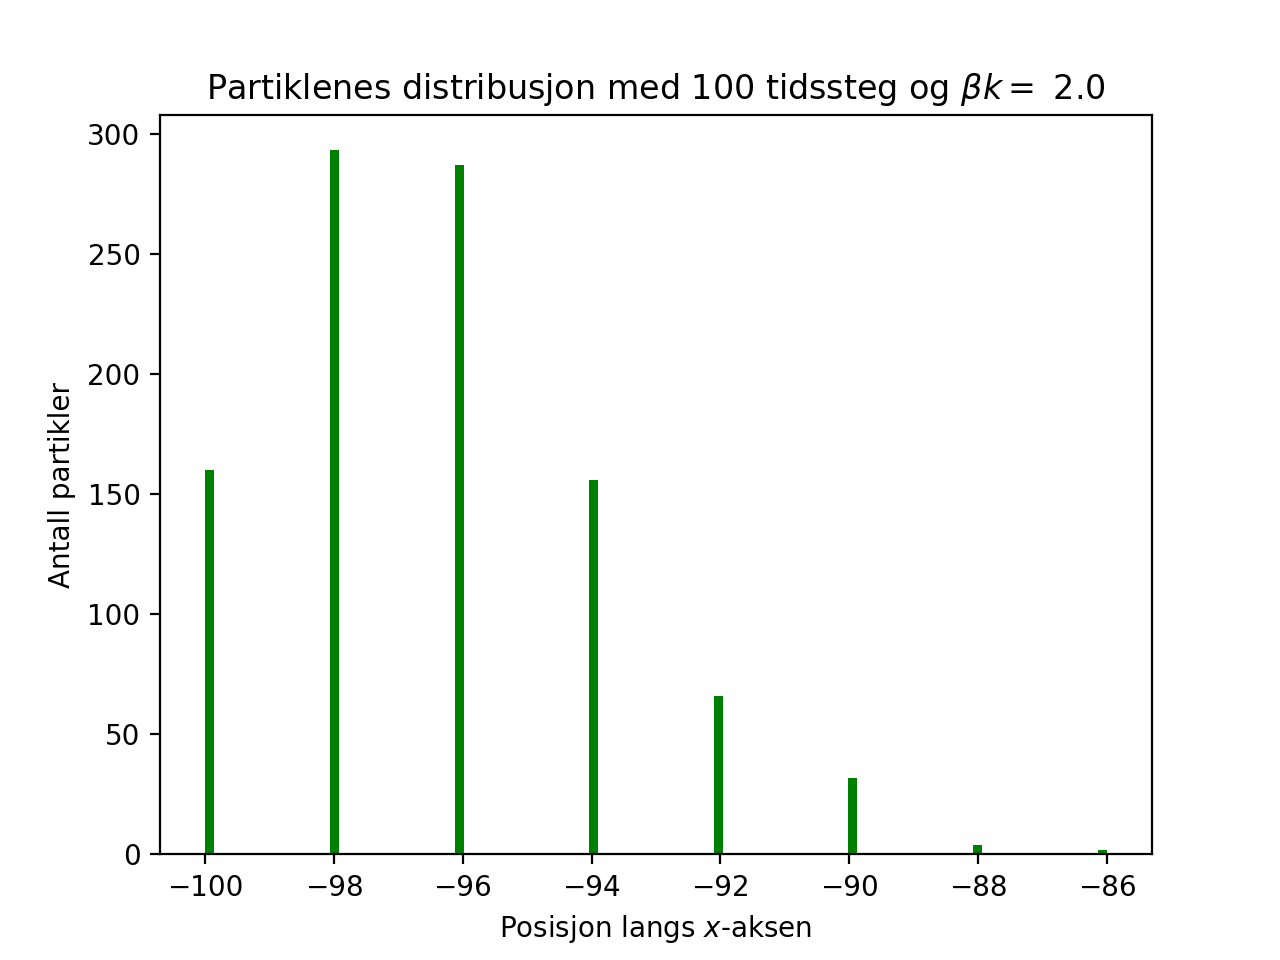

<IPython.core.display.Javascript object>


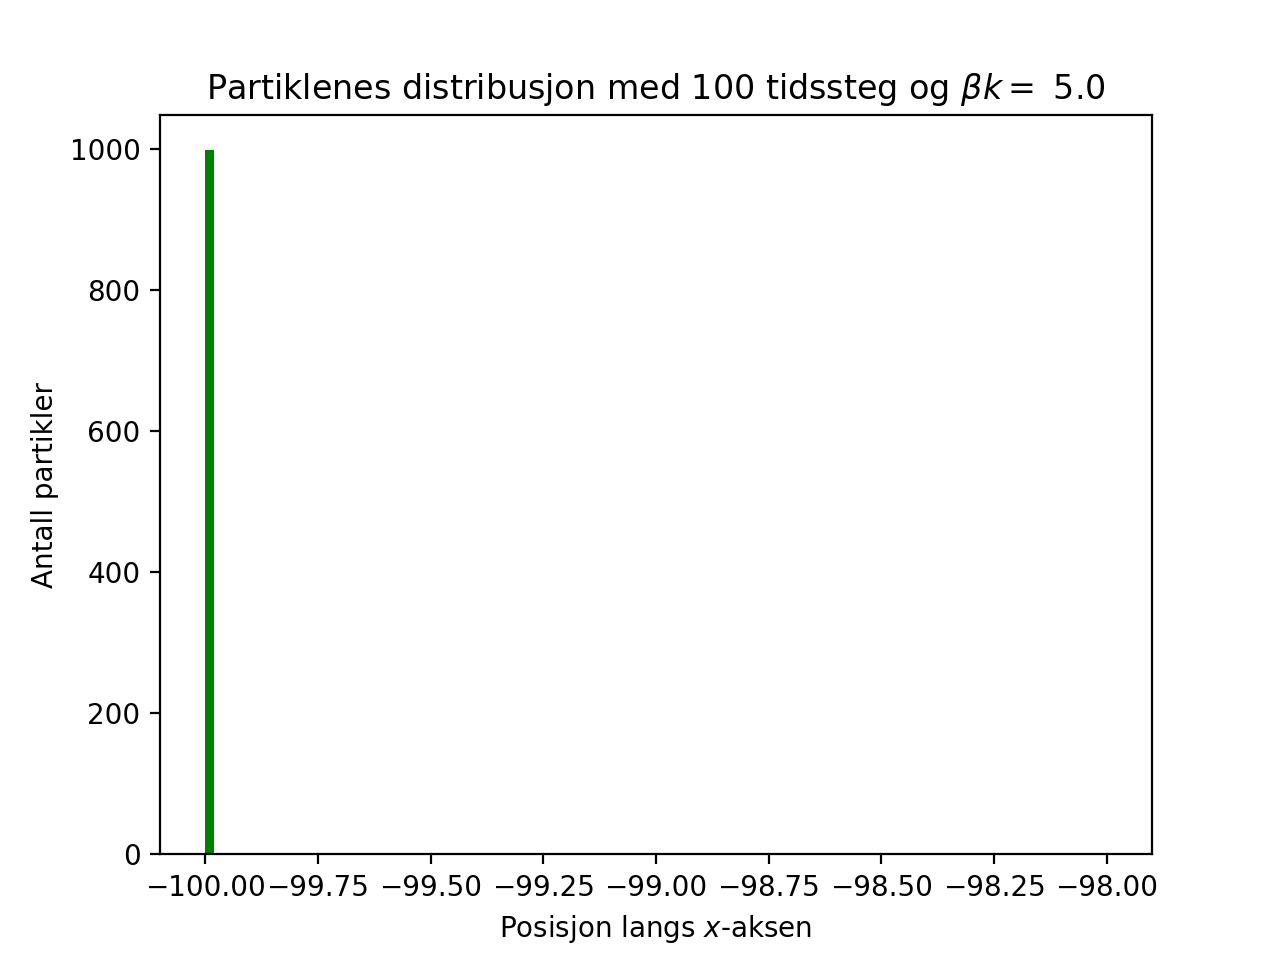

<IPython.core.display.Javascript object>


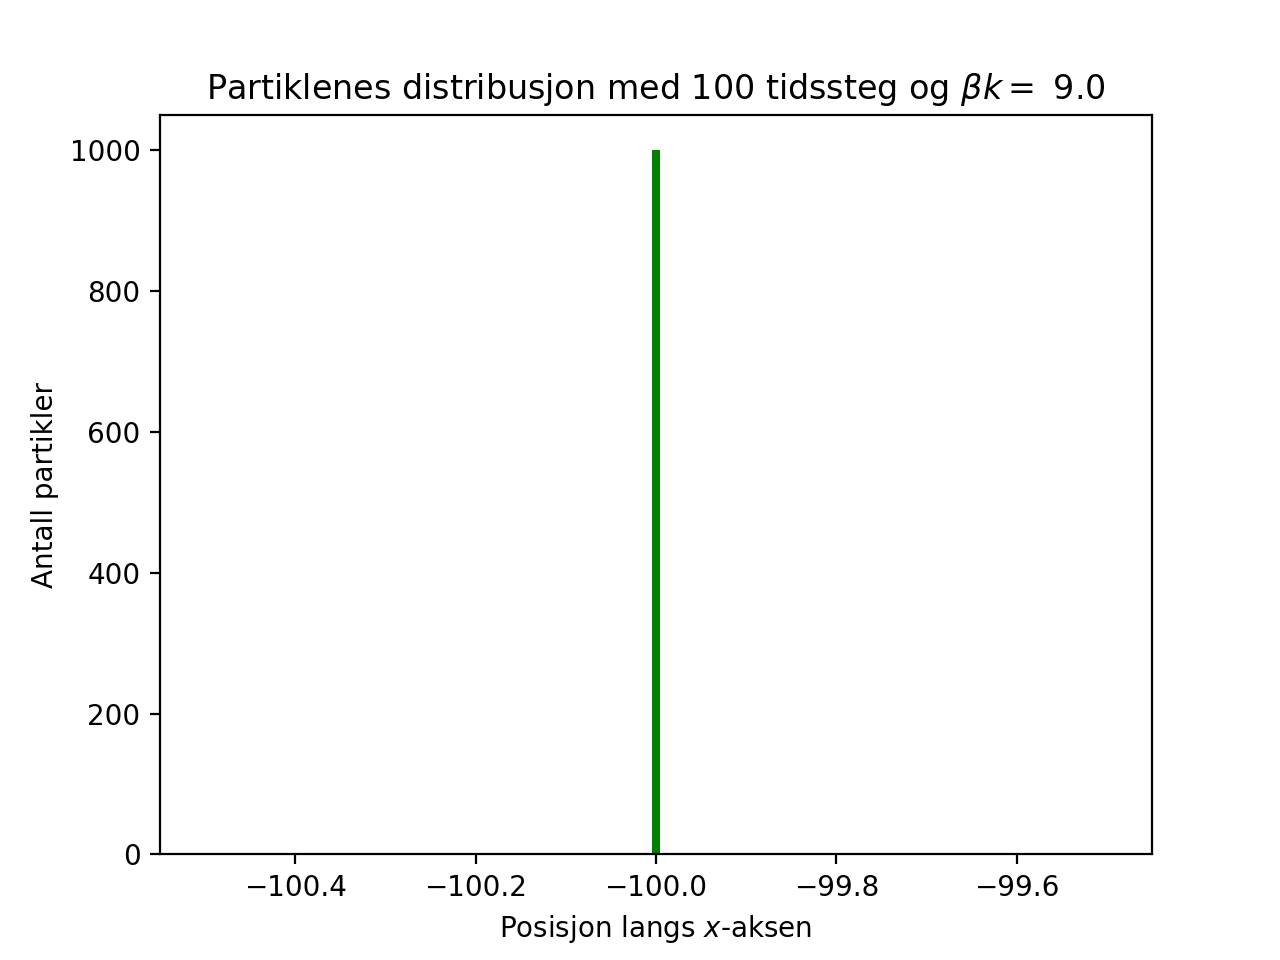

In [6]:
def V1(x, k, h=1):
    return k * x

ks = np.array([0.2, 2, 5, 9]) / beta
for k in ks:
    particles, steps = random_walk_in_potential(V1, k)
    plt.figure(beta * k)
    plt.hist(particles, bins=steps+1, color='g')
    plt.title("Partiklenes distribusjon med {} tidssteg og $βk=$ {}".format(steps, beta * k))
    plt.xlabel("Posisjon langs $x$-aksen")
    plt.ylabel("Antall partikler")
    plt.show()

Potensialet $V_1$ er et lineært potensial som har stigningstall $k$ og krysser origo. Jo lenger til høyre langs $x$-aksen, jo større vil da $V_1$ være. Derfor er det logisk at partiklene har større sannsynlighet for å havne til venstre for origo, der de slippes. Det er også fysisk at desto høyere $\beta k$ (og dermed $k$), desto høyere sannsynlighet er det for at partiklene vil bevege seg mot venstre. Denne korrelasjonen mellom størrelsen på $k$ og partiklenes bevegelse kommer klart frem i plottene over, som er plottet med de forskjellige verdiene for $\beta k$ gitt i tittelen for hvert plott.

### Oppgave 5.2

Her defineres potensialet

\begin{equation}
    V_2(x)= \begin{cases}
            k & \text{for } -3h<x<3h, \\
            0 & \text{ellers},
            \end{cases}
\end{equation}

og det plottes under for verdier av $k$ slik at $\beta k\in \{0.2, 2, 5, 9\}$.

<IPython.core.display.Javascript object>


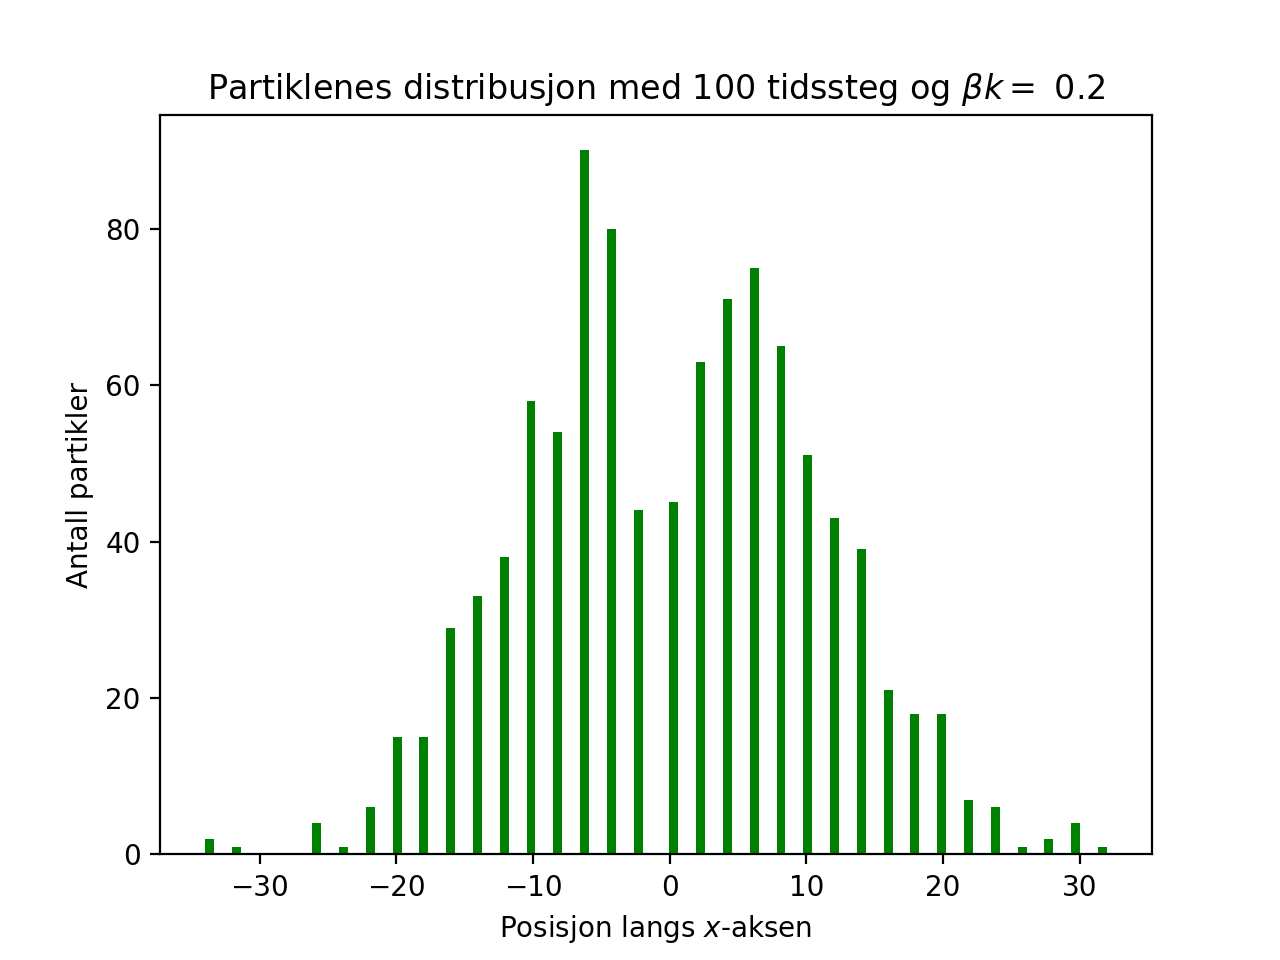

<IPython.core.display.Javascript object>


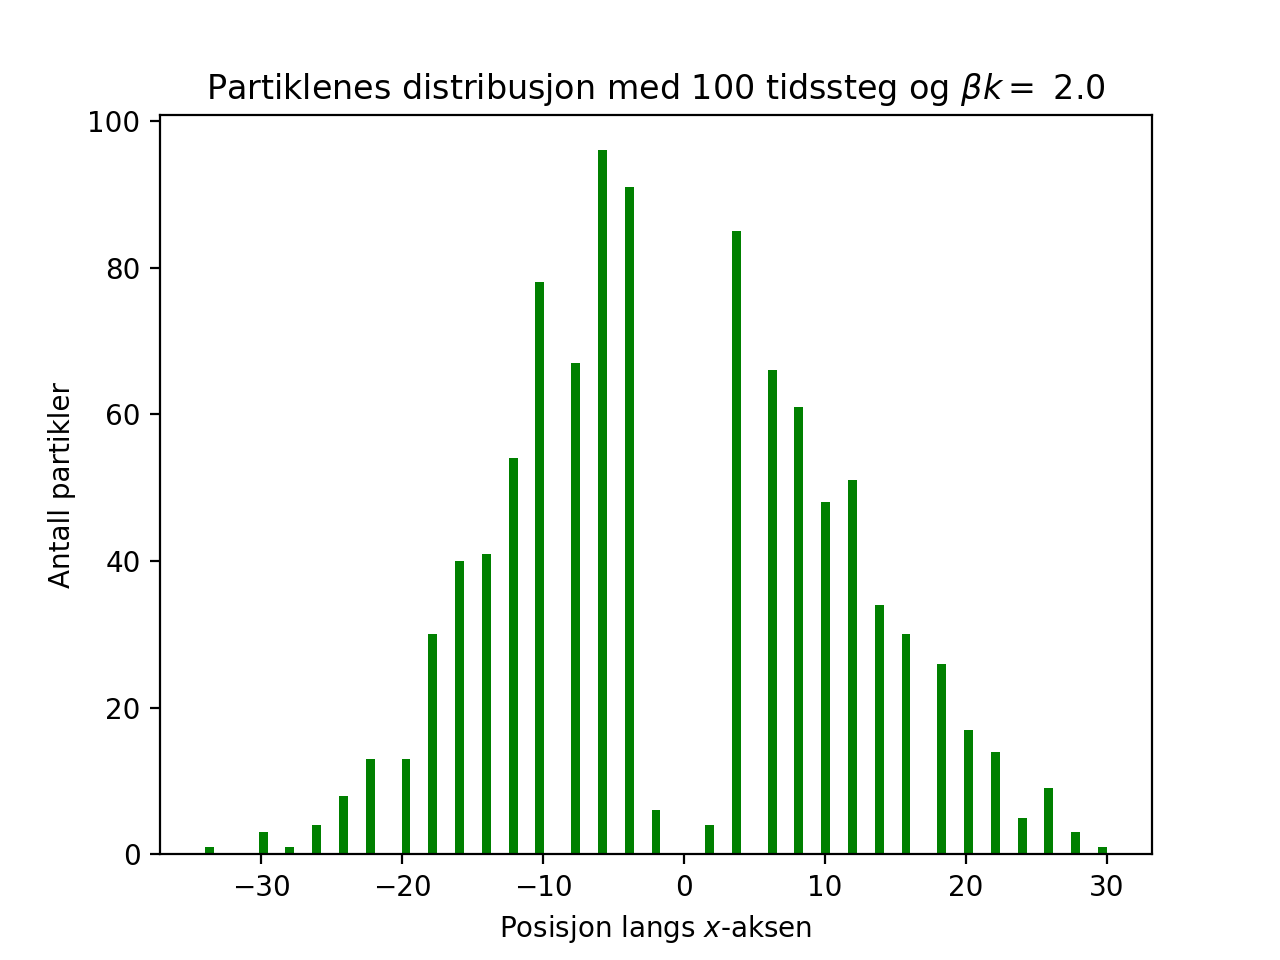

<IPython.core.display.Javascript object>


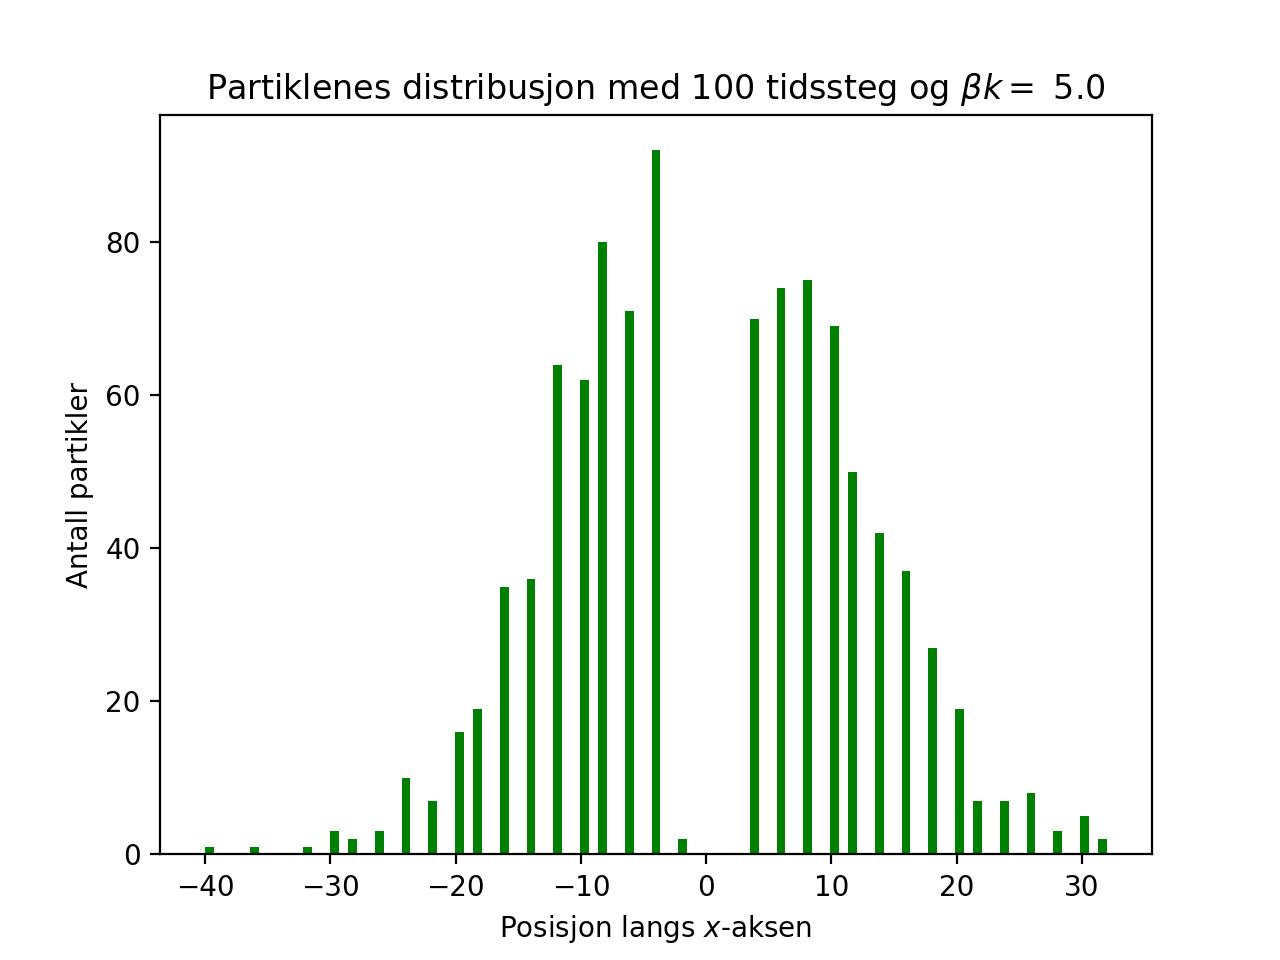

<IPython.core.display.Javascript object>


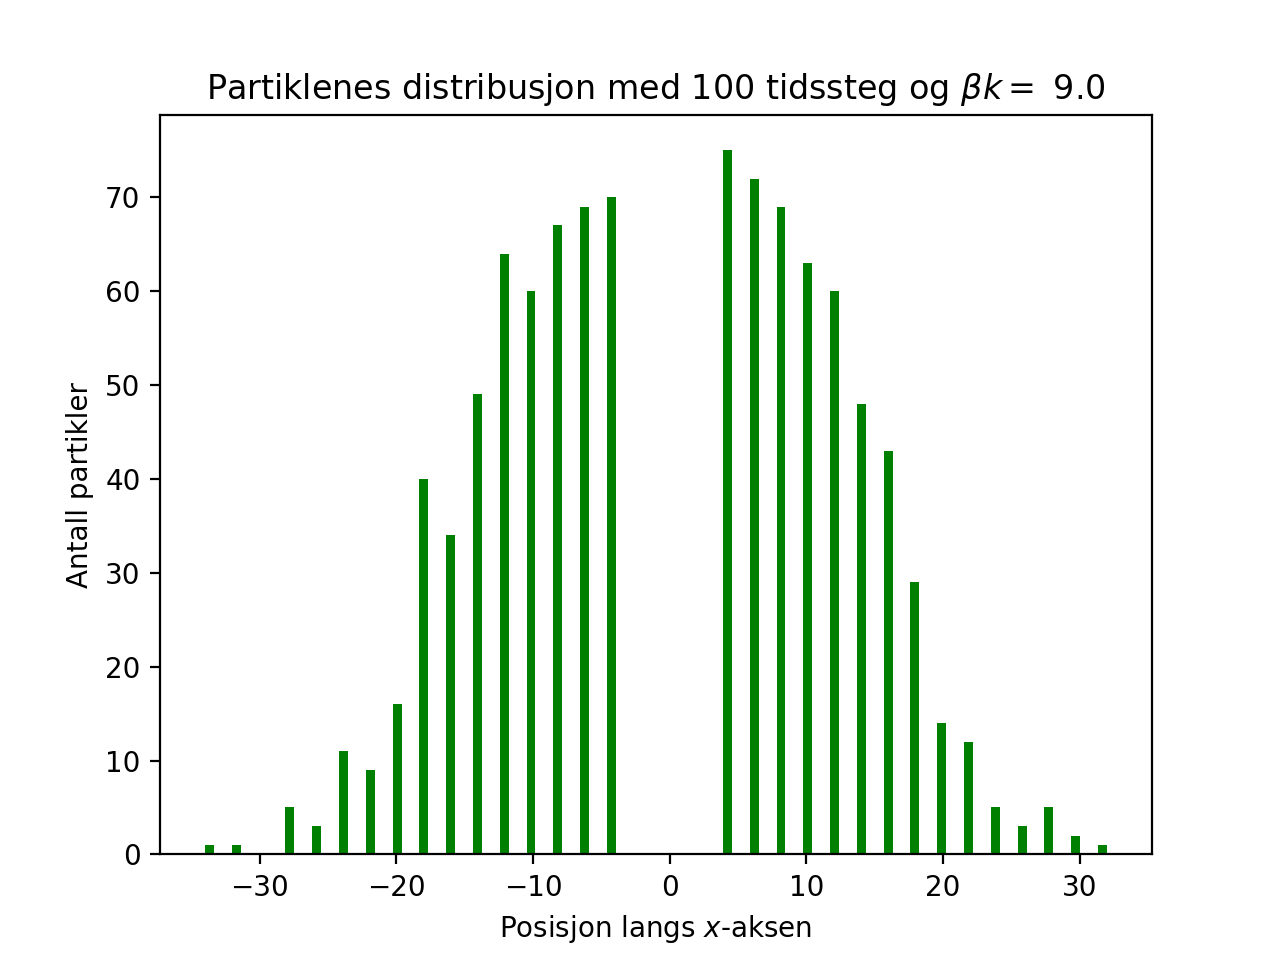

In [7]:
def V2(x, k, h):
    if x > -3 * h and x < 3 * h:
        return k
    return 0

ks = np.array([0.2, 2, 5, 9]) / beta
for k in ks:
    particles, steps = random_walk_in_potential(V2, k)
    plt.figure(beta * k + 10)
    plt.hist(particles, bins=steps+1, color='g')
    plt.title("Partiklenes distribusjon med {} tidssteg og $βk=$ {}".format(steps, beta * k))
    plt.xlabel("Posisjon langs $x$-aksen")
    plt.ylabel("Antall partikler")
    plt.show()

Potensialet $V_2$ er kun forskjellig fra null i området $-3h<x<3h$, og dette vil da være det eneste området vi vil se en merkbar konsekvens som forskjell fra oppgave 3. For $\beta k=0.2$ er potensialet $V_2$ nærme null og det er vanskelig å se en forskjell. Derimot for større $\beta k$ blir det klart at partiklene ikke vil tilbake til området $-3h<x<3h$ dersom det har beveget utenfor området en gang. Altså blir det for høyt potensial for partiklene å komme seg tilbake inn i området $-3h<x<3h$ om det allerede har gjennomgått en tilfeldig bevegelse ut fra området. Ved å se på plottene over kan vi se at disse opptrer fysisk slik vi ville tenkt oss for forskjellige verdier av $\beta k$.

### Oppgave 5.3

Her defineres potensialet

\begin{equation}
    V_3(x)= \begin{cases}
            -k & \text{for } x<-3h, \\
            k\left(2\frac{x+3h}{6h}-1\right) & \text{for } -3h\leq x\leq 3h, \\
            k & \text{for } x>3h,
            \end{cases}
\end{equation}

og det plottes under for verdier av $k$ slik at $\beta k\in \{0.2, 2, 5, 9\}$.

<IPython.core.display.Javascript object>


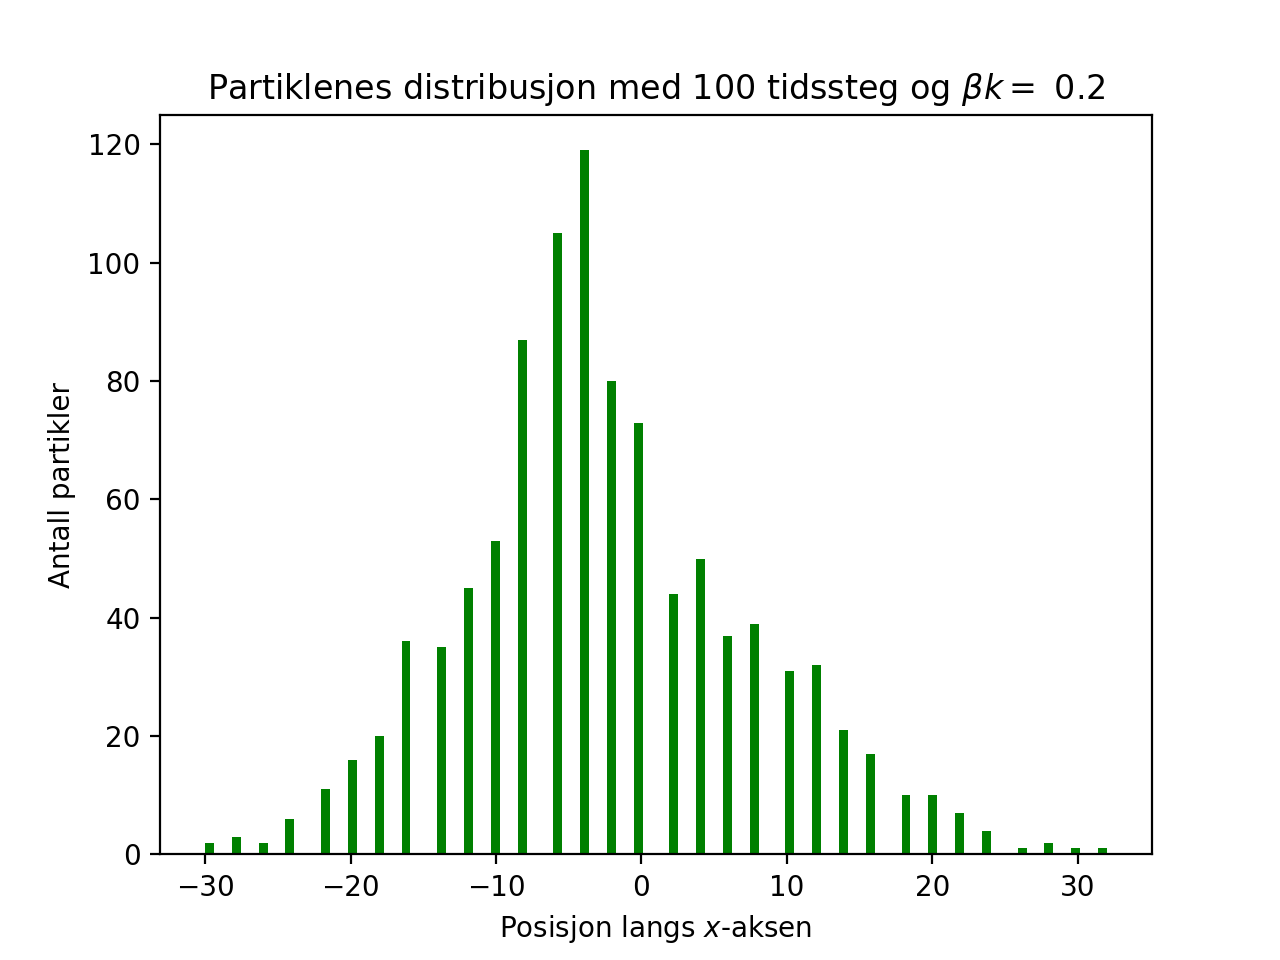

<IPython.core.display.Javascript object>


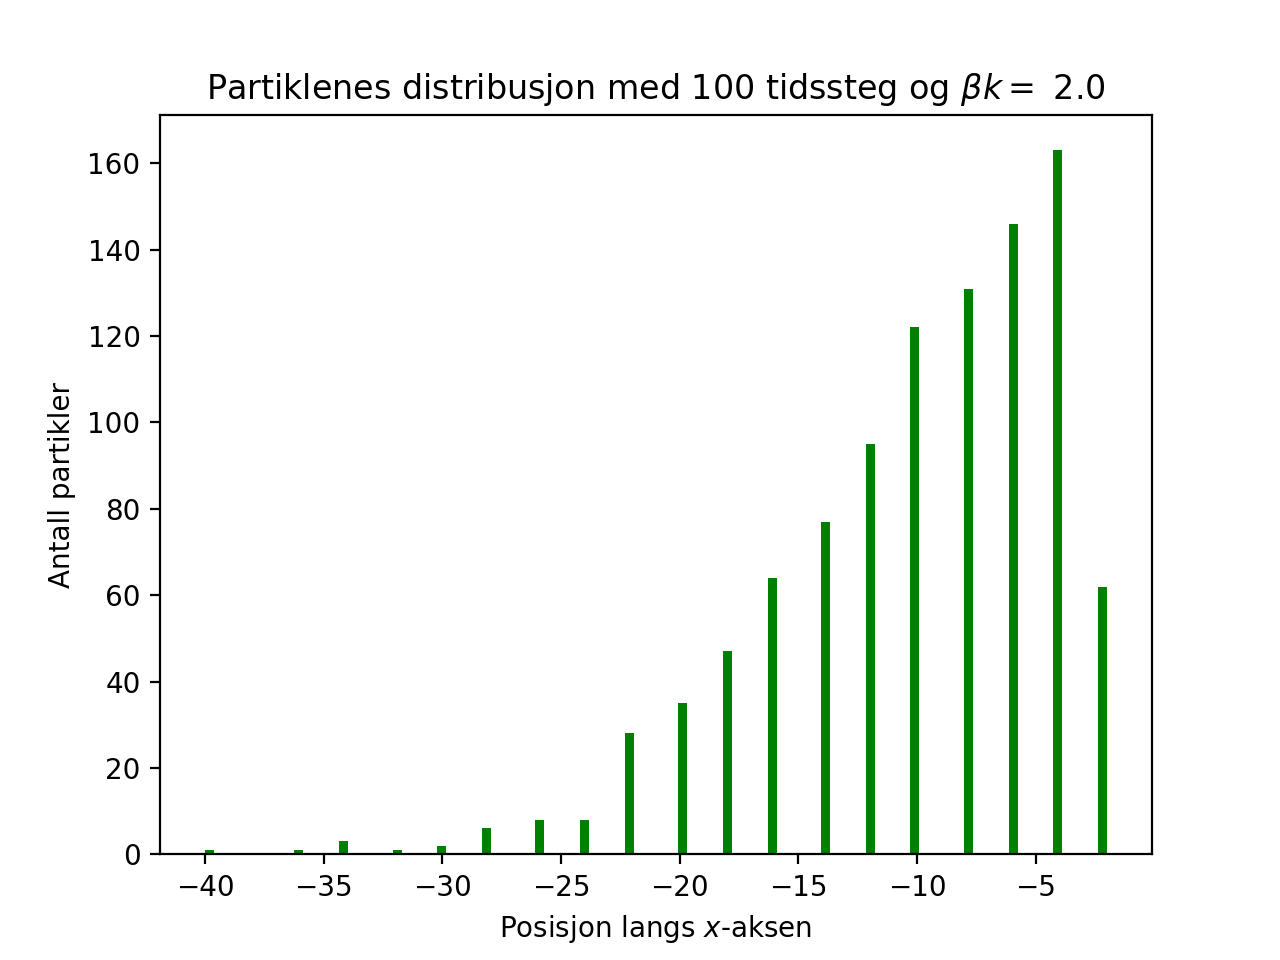

<IPython.core.display.Javascript object>


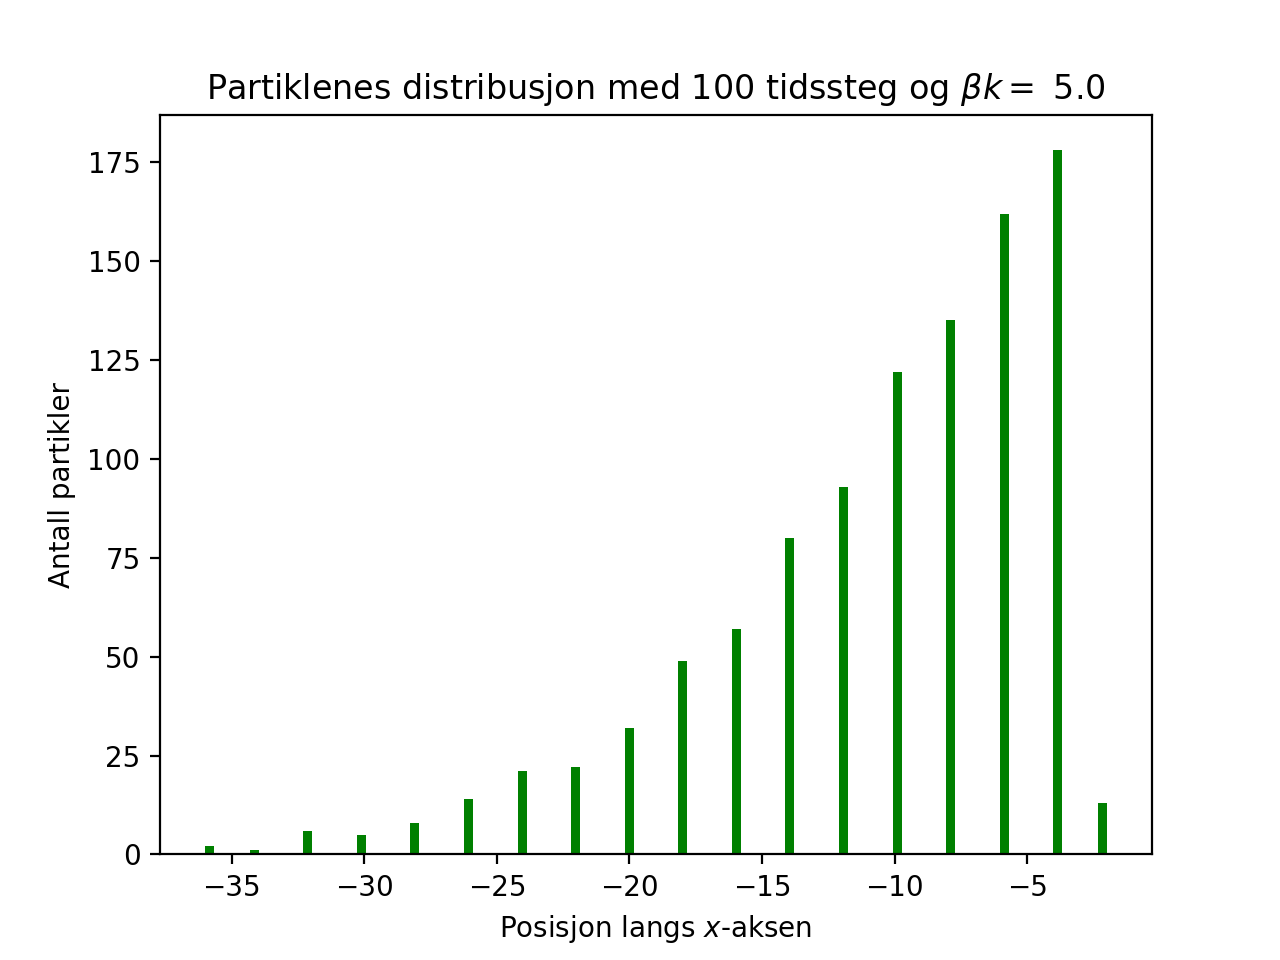

<IPython.core.display.Javascript object>


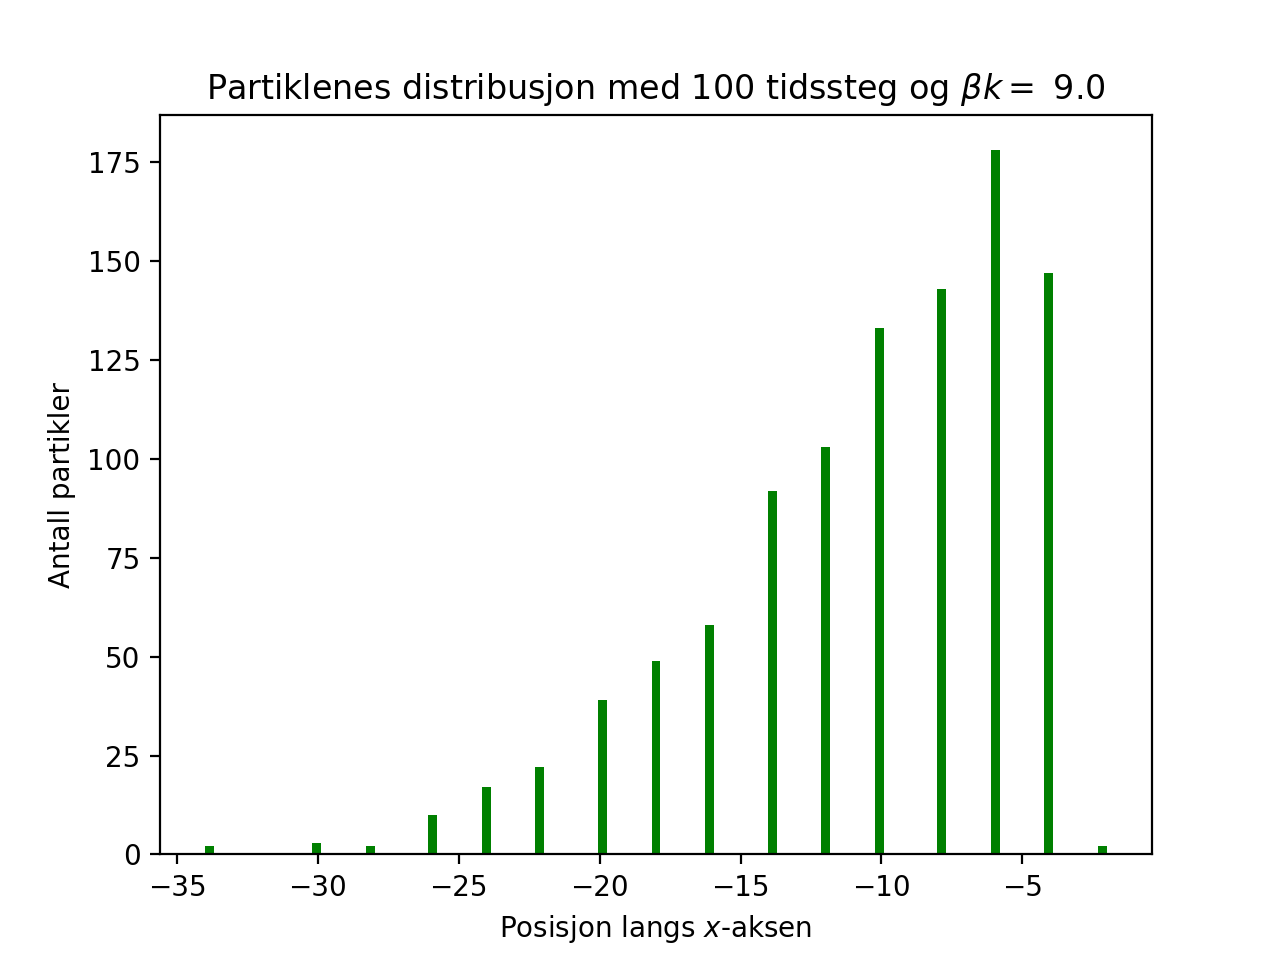

In [8]:
def V3(x, k, h):
    if x < -3 * h:
        return -k
    elif x > 3 * h:
        return k
    return k * (2 * (x + 3 * h) / (6 * h) - 1)

ks = np.array([0.2, 2, 5, 9]) / beta
for k in ks:
    particles, steps = random_walk_in_potential(V3, k)
    plt.figure(beta * k + 100)
    plt.hist(particles, bins=steps+1, color='g')
    plt.title("Partiklenes distribusjon med {} tidssteg og $βk=$ {}".format(steps, beta * k))
    plt.xlabel("Posisjon langs $x$-aksen")
    plt.ylabel("Antall partikler")
    plt.show()

Potensialet $V_3$ har for $k=h=1$ i intervallet $[-8,8]$ formen som vist under.

<IPython.core.display.Javascript object>


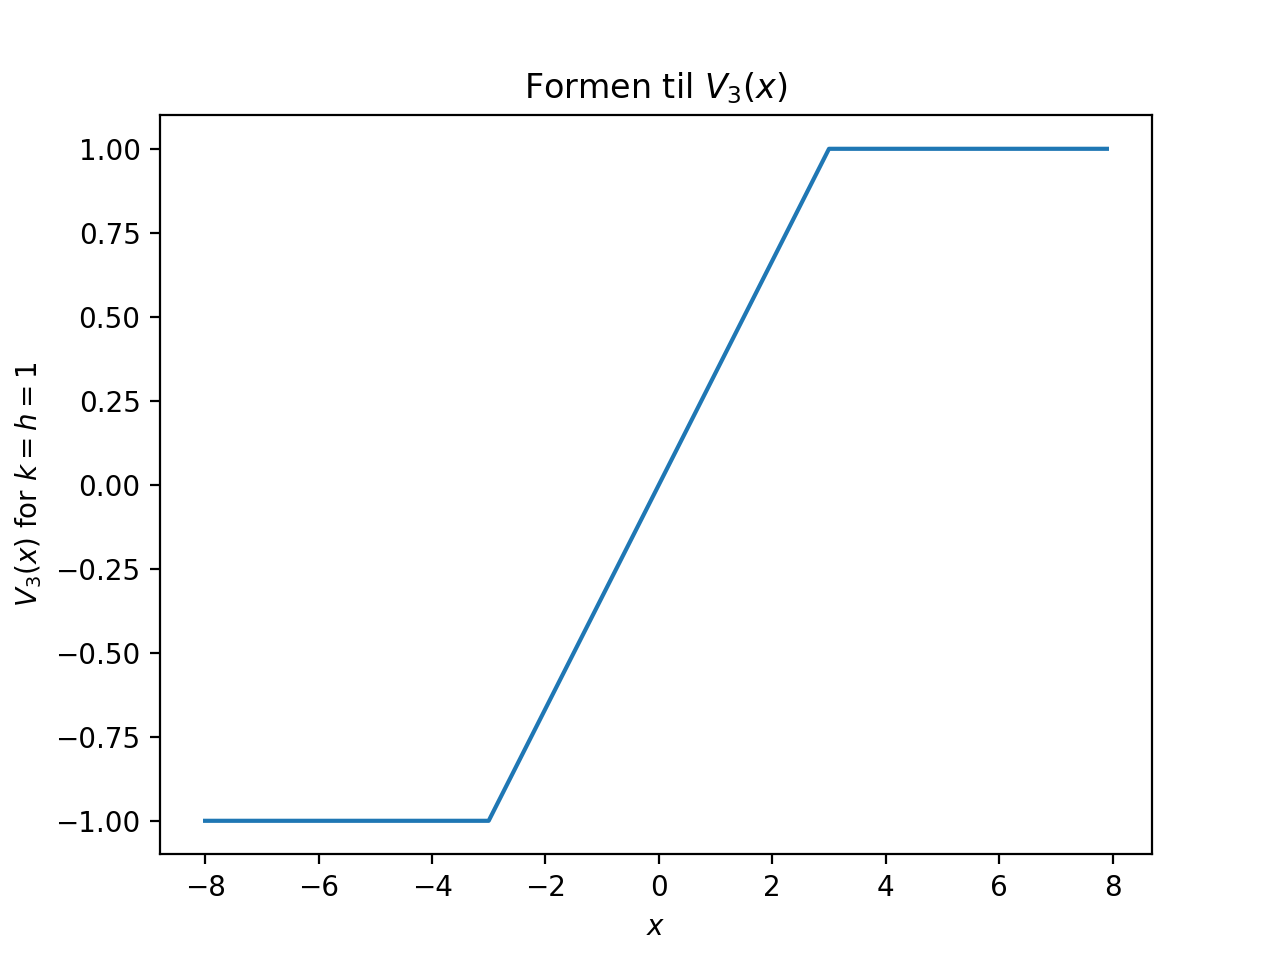

In [9]:
x_vals = np.arange(-8, 8, 0.1)
y_vals = np.zeros(x_vals.size)
for i in range(x_vals.size):
    y_vals[i] += V3(x_vals[i], 1, 1)

plt.figure("Formen til V_3")
plt.plot(x_vals, y_vals)
plt.title("Formen til $V_3(x)$")
plt.xlabel('$x$')
plt.ylabel("$V_3(x)$ for $k=h=1$")
plt.show()

Fra dette kan vi da se at for partikler som starter i området $-3h\leq x\leq 3h$, som partiklene her gjør, har større sannsynlighet for å bevege seg til venstre. Denne trenden ser vi i alle plottene over, men blir naturligvis mer fremtredende når $\beta k$ øker. For større $\beta k$ vil det være vanskeligere for partikkelen å bevege seg til høyre og for større $\beta k$ vil flere partikler ende opp til venstre for null.

I hele oppgave 5 er $\beta k$ forholdet mellom den termiske energien til systemet og potensialet som partiklene beveger seg i. Det er klart at siden graden av diffusjon avhenger av temperaturen, og dermed den termiske energien, vil diffusjon være vanskeligere for partiklene for større verdi av $\beta k$. Dette ser vi at stemmer fint med plottene vi har i hele oppgave 5, og det er derfor rimelig at partiklene tenderer mot der potensialet er lavest som forklart over.

## Oppgave 7

Følgende kode brukes i hele oppgave 7, og også i oppgave 8.

In [10]:
def V_tot(x, h, V_time, V_ion, L):
    V = lambda x: -V_time * (x - h) / (2 * h) + V_ion
    potential = np.array([np.inf, V_time, V, 0])
    conditions = np.array([np.logical_or((x < -L / 2), (x > L / 2)),  np.logical_and((x >= -L / 2), (x < -h)),
                           np.logical_and((x >= -h), (x <= h)), np.logical_and((x > h), (x <= L / 2))])
    return np.piecewise(x, conditions, potential)

def position_step(position_list, V_time, V_ion, h, L):
    random_list = np.random.uniform(size=position_list.size)
    delta_V_list = V_tot(position_list - h, h, V_time, V_ion, L) - V_tot(position_list + h, h, V_time, V_ion, L)
    P_pluss_list = 1 / (1 + np.exp(-delta_V_list))
    step_list = ((P_pluss_list - random_list) > 0)
    new_position = position_list + step_list * h + (step_list - np.ones(step_list.size)) * h
    return new_position

### Oppgave 7.1

<IPython.core.display.Javascript object>


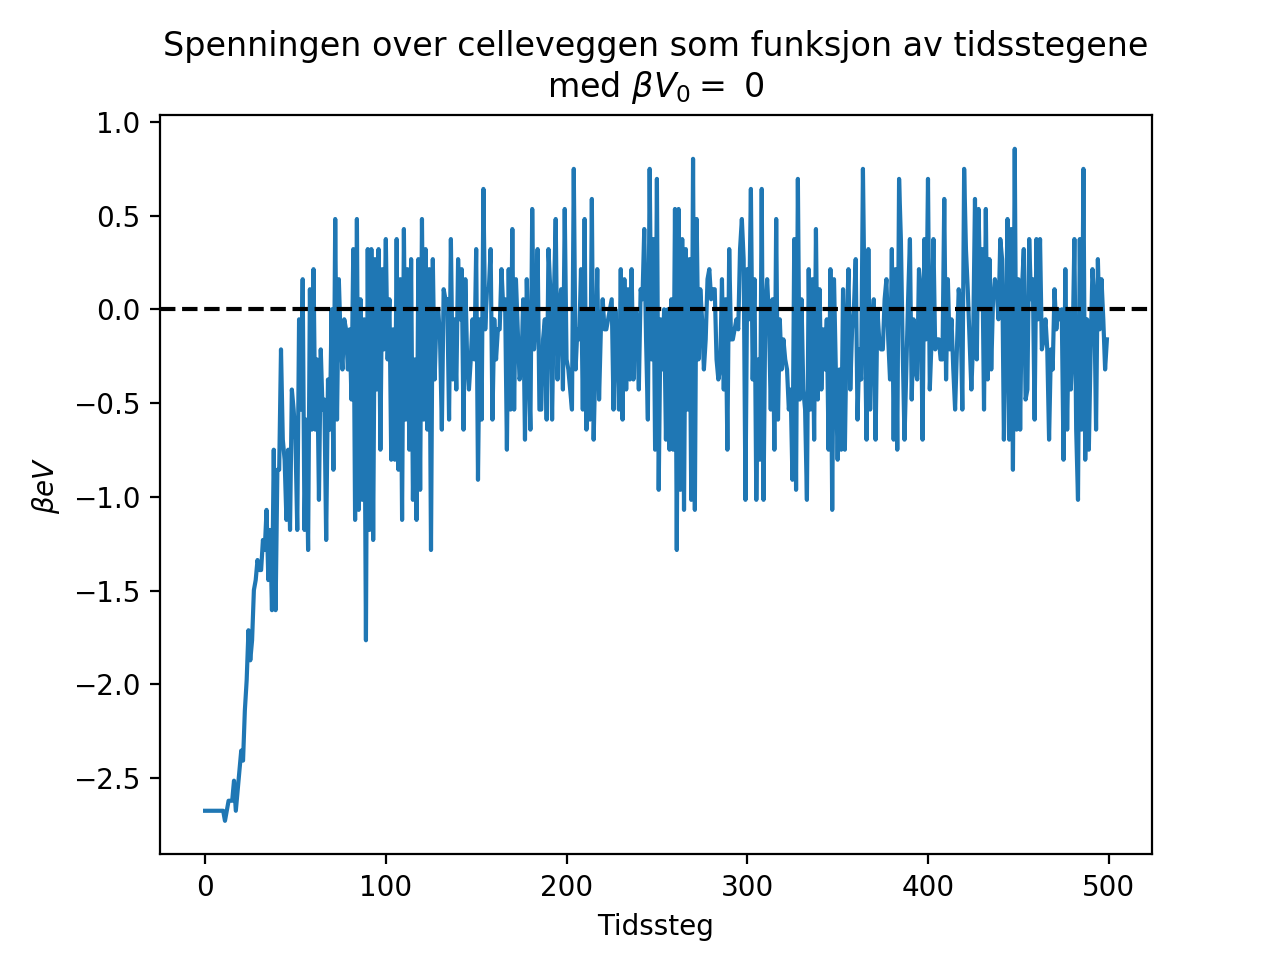

<IPython.core.display.Javascript object>


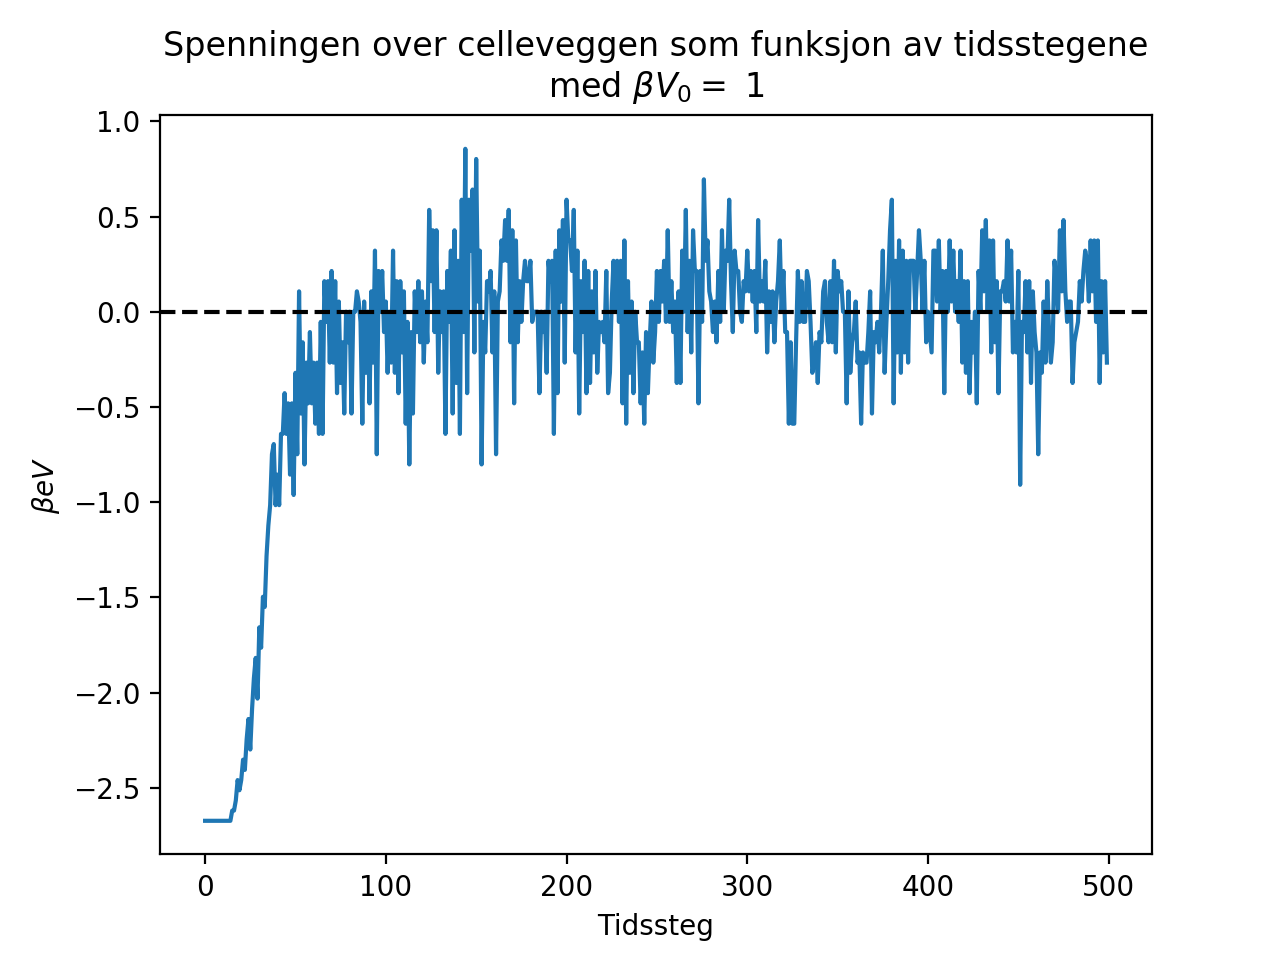

<IPython.core.display.Javascript object>


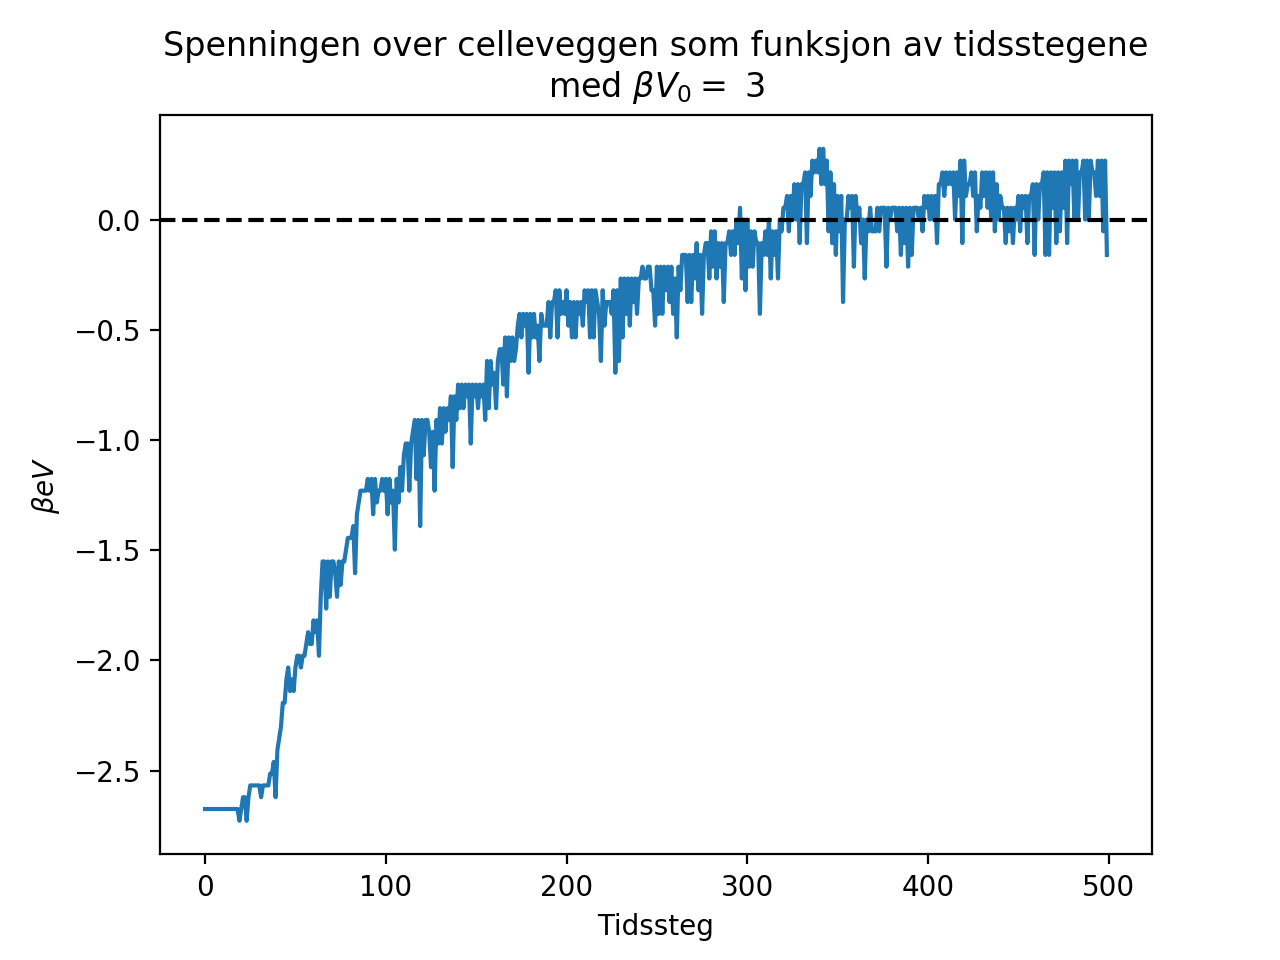

In [11]:
def random_walk_accross_cell_membrane_1(V_Na_0, V_K_0, h=1, L=50, C_c=0.07, steps=500,
                                        Na_outside_0=1450, Na_inside_0=50, K_outside_0=50, K_inside_0=1400):
    
    start_outside, start_inside = L / 4, -L / 4
    
    step_vals = np.arange(steps)
    
    Na_outside_list, K_outside_list = np.full(Na_outside_0, start_outside), np.full(K_outside_0, start_outside)
    K_inside_list, Na_inside_list = np.full(K_inside_0, start_inside), np.full(Na_inside_0, start_inside)
    
    Na_list = np.concatenate((Na_outside_list, Na_inside_list))
    K_list = np.concatenate((K_outside_list, K_inside_list))
    
    outside_consentration = (Na_outside_0 + K_outside_0) * e * 0.1e-3
    
    V = ((Na_inside_0 + K_inside_0) * 0.1e-3 - outside_consentration) / C_c
    V_list = np.zeros(steps)
    
    for i in range(steps):
        
        rand_Na = np.random.uniform(size=Na_list.size)
        rand_K = np.random.uniform(size=K_list.size)
        
        Na_list = position_step(Na_list, V, V_Na_0, h, L)
        Na_inside = np.count_nonzero(Na_list < -h)
        
        K_list = position_step(K_list, V, V_K_0, h, L)
        K_inside = np.count_nonzero(K_list < -h)
        
        V = ((Na_inside + K_inside) - (Na_outside_0 + K_outside_0)) * 0.1e-3 * e * beta / C_c
        V_list[i] += V
        
    return V_list, step_vals
    
beta_V_0s = np.array([0, 1, 3])
for beta_V_0 in beta_V_0s:
    V_list, step_vals = random_walk_accross_cell_membrane_1(beta_V_0, beta_V_0)
    
    plt.figure(beta_V_0 + 1000)
    plt.plot(step_vals, V_list)
    plt.axhline(y=0, color='k', linestyle='--')
    plt.title("Spenningen over celleveggen som funksjon av tidsstegene\nmed $βV_0=$ {}".format(beta_V_0))
    plt.xlabel("Tidssteg")
    plt.ylabel("$βeV$")
    plt.show()

Over er $\beta eV$, som representerer voltdifferansen mellom det intracellulære rom og det ekstracellulære rom av cellen, plottet mot tidsstegene med verdier for $\beta V_0\in\{0,1,3\}$. Simuleringen starter med 1450 $\text{Na}^+$-ioner utenfor cellen og 50 inni cellen, og 50 $\text K^+$-ioner utenfor cellen og 1400 inni cellen.

For $\beta V_0=0$ vil ikke ionene bli påvirket av et annet potensial enn spenningsforskjellen $V(t)$. Det er derfor rimelig at $V(t)$ (og dermed også den plottede $\beta eV(t)$) vil bevege seg raskt mot null. Den vil så ligge rundt $V(t)=0$, men på grunn av ionenes virrevandring til tross for spenningen vil det være avvik. Vi ser at dette stemmer godt med plottet, der den sorte stiplede linjen svarer til $V(t)=0$.

Når vi ser på tilfellet der $\beta V_0=1$ ser vi at $V(t)$ også her nærmer seg null relativt fort, dog det kan se ut som at den beveger seg noe saktere enn for $\beta V_0=0$. I dette tilfellet vil ionene være påvirket av et eget potensial gitt ved $\beta V_0=1$ og det vil derfor være fornuftig at graden av diffusjon over cellemembranen går ned i forhold til for $\beta V_0=0$. Vi kan se at når spenningen $V(t)$ har nådd en verdi omkring null, vil det være mindre utslag fra $V(t)=0$ enn for $\beta V_0=0$. Dette kan forklares med at ionene blir påvirket av dette ekstra potensialet som gjør det vanskeligere å diffundere over cellemembranen.

Til slutt har vi tilfellet der $\beta V_0=3$. Her ser vi at effektene vi beskrev i forrige avsnitt er forsterket ved at det tar lenger tid for potensialet å nå nullområdet, men at variasjonene omkring $V(t)=0$ er drastisk mindre. Dette kan forklares med at i dette tilfellet vi ionene bli påvirket av et enda sterkere potensial i tillegg til $V(t)$, slik at diffusjon blir enda vanskeligere. Dette vil gjøre slik at partiklene vil holde seg i større grad slik at $V(t)\approx 0$.

### Oppgave 7.2

<IPython.core.display.Javascript object>


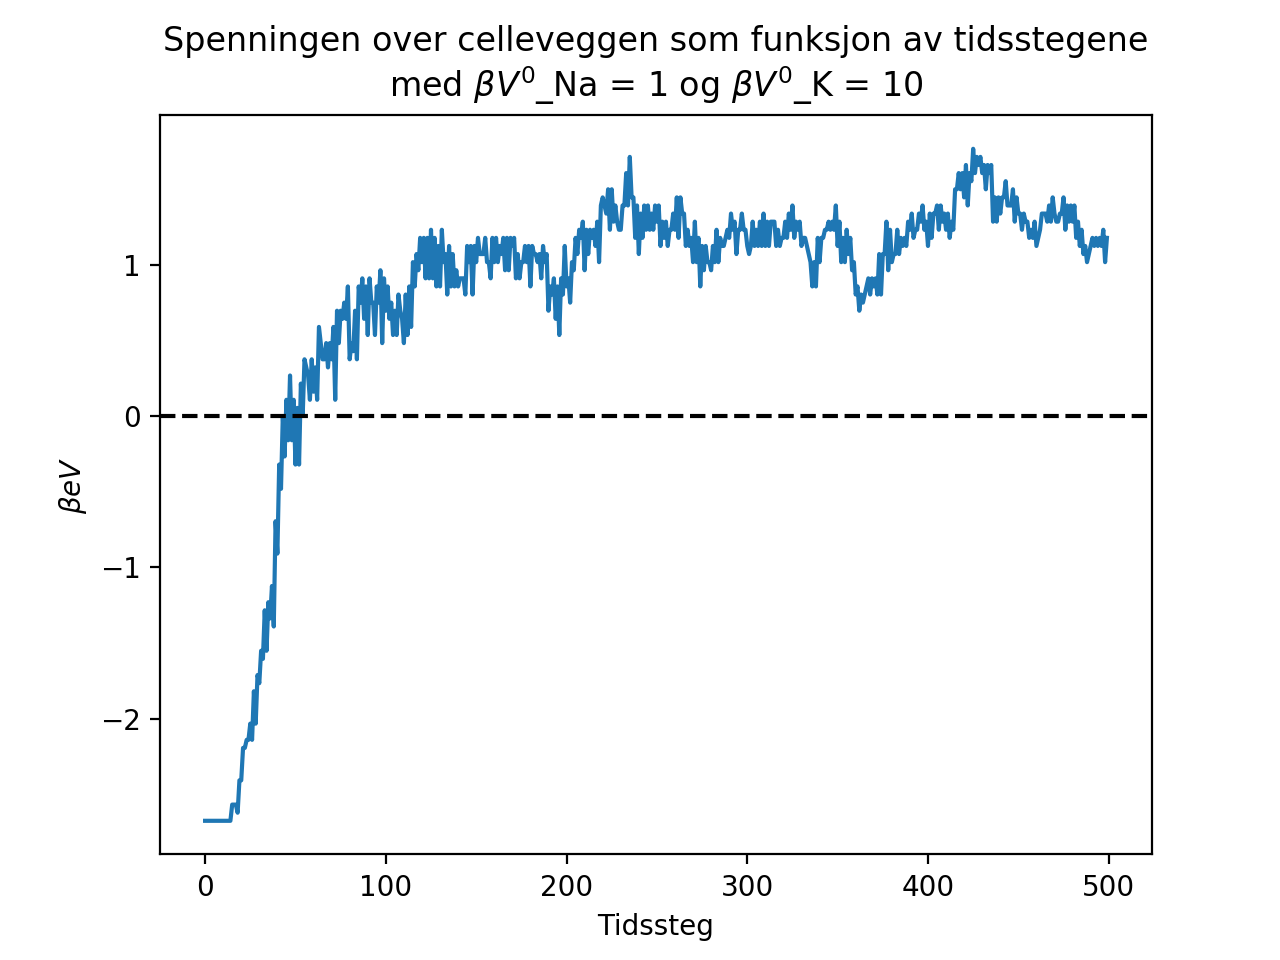

<IPython.core.display.Javascript object>


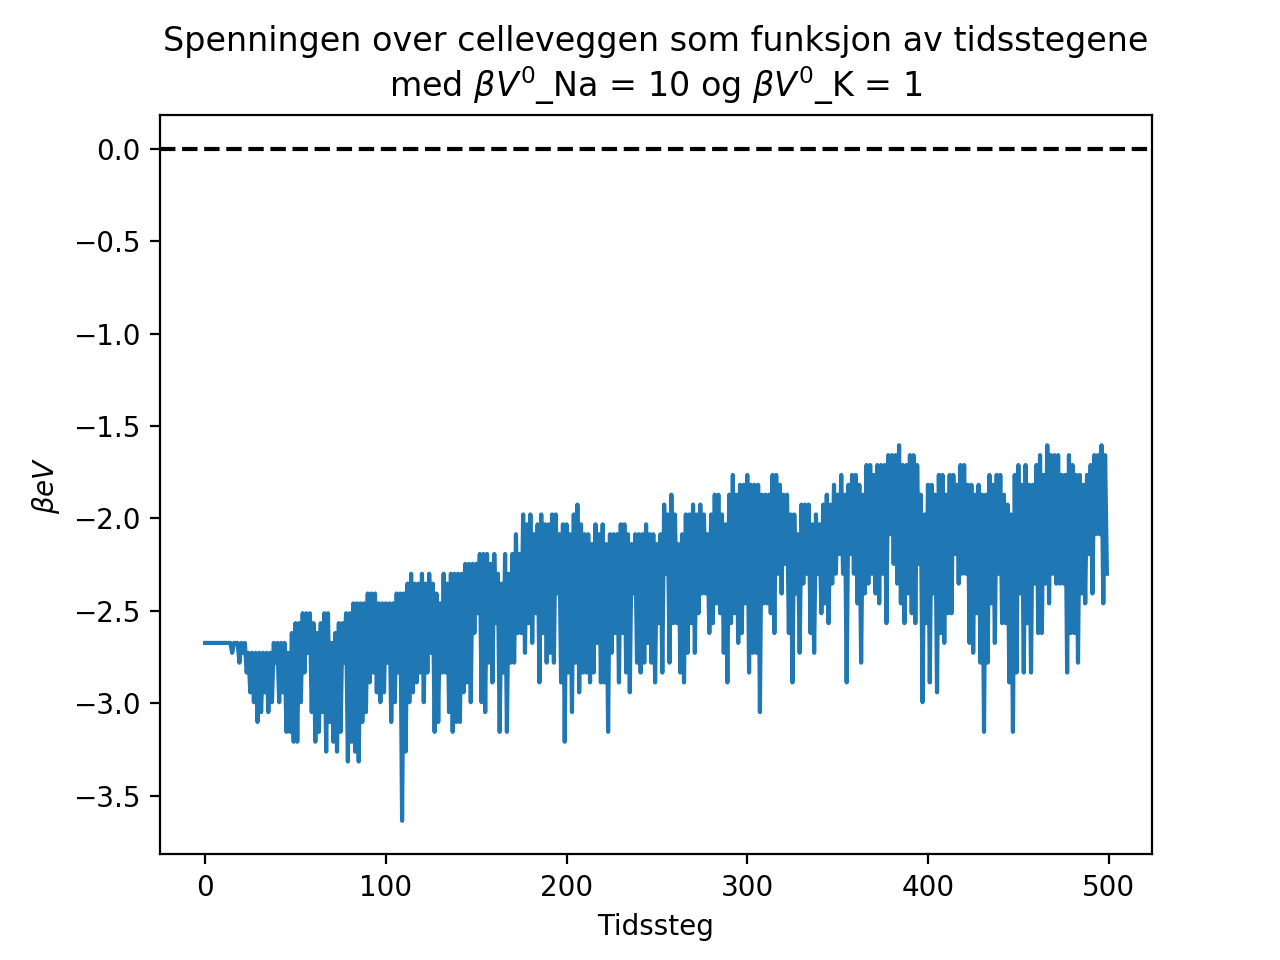

In [12]:
V_list, step_vals = random_walk_accross_cell_membrane_1(1, 10)

plt.figure("Spenning over cellevegg med forskjellig beta*V_0")
plt.plot(step_vals, V_list)
plt.axhline(y=0, color='k', linestyle='--')
plt.title("Spenningen over celleveggen som funksjon av tidsstegene\nmed $βV^0$_Na = {} og $βV^0$_K = {}".format(1, 10))
plt.xlabel("Tidssteg")
plt.ylabel("$βeV$")
plt.show()

V_list, step_vals = random_walk_accross_cell_membrane_1(10, 1)

plt.figure("Spenning over cellevegg med enda en forskjellig beta*V_0")
plt.plot(step_vals, V_list)
plt.axhline(y=0, color='k', linestyle='--')
plt.title("Spenningen over celleveggen som funksjon av tidsstegene\nmed $βV^0$_Na = {} og $βV^0$_K = {}".format(10, 1))
plt.xlabel("Tidssteg")
plt.ylabel("$βeV$")
plt.show()

Over ser vi $\beta eV$ plottet som funksjon av tidsstegene for tilfellet der $\beta V^0_\text{Na}=1$ og $\beta V^0_\text{K}=10$, øverst, og $\beta V^0_\text{Na}=10$ og $\beta V^0_\text{K}=1$, nederst. Igjen representerer den sorte stiplede linjen $V(t)=0$ og vi ser en stor kvalitativ forskjell mellom disse figurene og de vi fikk i oppgave 7.1. Vi bruker samme startbetingelser som i forrige oppgave, og vil bruke dem i resten av prosjektet.

Vi ser først på det øverste tilfellet med $\beta V^0_\text{Na}=1$ og $\beta V^0_\text{K}=10$. Vi starter med 1450 $\text{Na}^+$-ioner utenfor cellen og 1400 $\text K^+$-ioner inni cellen, mens vi har 50 av hver i motsatt del av systemet. Med en stor $\beta V^0_\text{K}$ er sannsynligheten for at $\text K^+$-ionene beveger seg ut av cellen svært liten. Derimot vil det være en konsentrasjonsforskjell og en spenningsforskjell slik at $\text{Na}^+$-ionene vil bevege seg fort inn i cellen for å utjevne disse forskjellene. Etter en tid er spenningsforskjellen opphevet og $V(t)=0$. Derimot vil det enda være en konsentrasjonsforskjell, slik at $\text{Na}^+$-ionene fortsetter å bevege seg inn i cellen, dette kan de i hele dette tilfelle gjøre siden $\beta V^0_\text{Na}=1$, en relativt lav verdi for potensialet. Etter en viss tid vil også konsentrasjonsforskjellene utlignes, og da vil $V(t)$ ligge rundt en positiv verdi for $\beta eV$, og dermed for $V(t)$.

For tilfellet $\beta V^0_\text{Na}=10$ og $\beta V^0_\text{K}=1$ vil det bli motsatt. Her er $\text{Na}^+$-ionene fanget utenfor cellen og sannsynligheten for at de beveger seg gjennom cellemembranen er meget liten. Derimot vil $\text K^+$-ionene bevege seg raskt ut av cellen på grunn av konsentrasjonsforskjeller. Spenningsforskjellene derimot vil at $\text K^+$-ionene skal bevege seg inn i cellen. I dette tilfellet er det derfor klart at spenningen vil ligge rundt en negativ verdi i motsetning til i avsnittet over, på grunn av at det vil dannes en likevekt mellom konsentrasjonsforskjellens og spenningsforskjellens bidrag til bevegelsen av ionene.

## Oppgave 8
### Oppgave 8.1

<IPython.core.display.Javascript object>


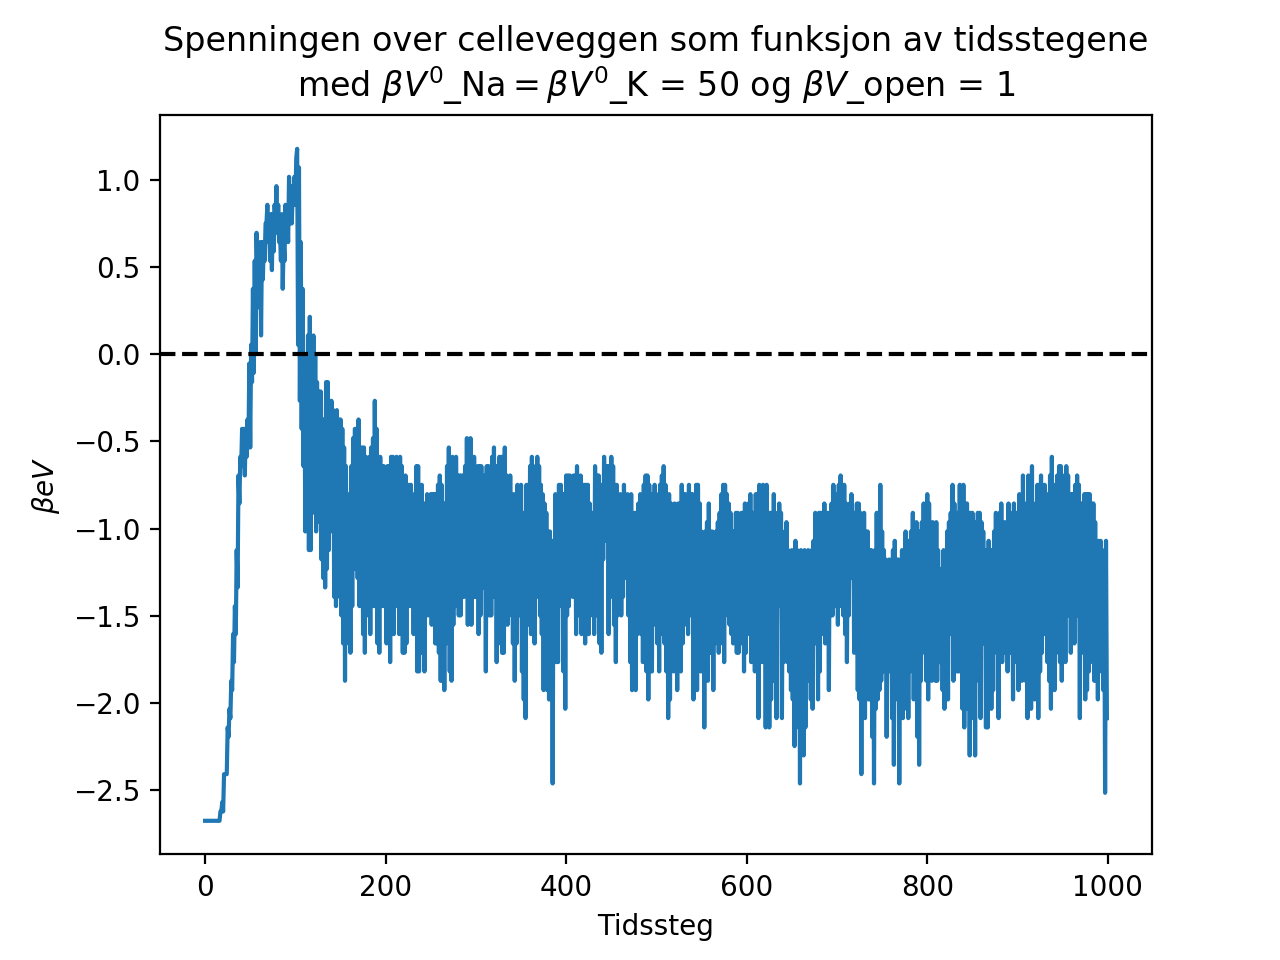

In [13]:
def ion_gate(beta_V_time, beta_V_K, beta_V_Na, beta_V_open, beta_V_closed=50, high=30e-3*e*beta, low=-70e-3*e*beta):
    if beta_V_time <= low:
        beta_V_K = beta_V_closed
        beta_V_Na = beta_V_open
    elif beta_V_time >= high:
        beta_V_K = beta_V_open
        beta_V_Na = beta_V_closed
    return beta_V_K, beta_V_Na

def random_walk_accross_cell_membrane_2(V_Na_0=50, V_K_0=50, V_open=1, h=1, L=50, C_c=0.07, steps=1000,
                                        Na_outside_0=1450, Na_inside_0=50, K_outside_0=50, K_inside_0=1400):
    
    start_outside, start_inside = L / 4, -L / 4
    
    step_vals = np.arange(steps)
    
    Na_outside_list, K_outside_list = np.full(Na_outside_0, start_outside), np.full(K_outside_0, start_outside)
    K_inside_list, Na_inside_list = np.full(K_inside_0, start_inside), np.full(Na_inside_0, start_inside)
    
    Na_list = np.concatenate((Na_outside_list, Na_inside_list))
    K_list = np.concatenate((K_outside_list, K_inside_list))
    
    outside_consentration = (Na_outside_0 + K_outside_0) * 0.1e-3
    
    V = ((Na_inside_0 + K_inside_0) * 0.1e-3 - outside_consentration) / C_c
    V_list = np.zeros(steps)
    
    for i in range(steps):
        
        rand_Na = np.random.uniform(size=Na_list.size)
        rand_K = np.random.uniform(size=K_list.size)
        
        V_K_0, V_Na_0 = ion_gate(V, V_K_0, V_Na_0, V_open)
        
        Na_list = position_step(Na_list, V, V_Na_0, h, L)
        Na_inside = np.count_nonzero(Na_list < -h)
        
        K_list = position_step(K_list, V, V_K_0, h, L)
        K_inside = np.count_nonzero(K_list < -h)
        
        V = ((Na_inside + K_inside) - (Na_outside_0 + K_outside_0)) * 0.1e-3 * e * beta / C_c
        V_list[i] += V
        
    return V_list, step_vals

V_list, step_vals = random_walk_accross_cell_membrane_2()

plt.figure("Spenningen over celleveggen som funksjon av tidsstegene med V_open")
plt.plot(step_vals, V_list)
plt.axhline(y=0, color='k', linestyle='--')
plt.title("Spenningen over celleveggen som funksjon av tidsstegene\
\nmed $βV^0$_Na$=βV^0$_K = {} og $βV$_open = {}".format(50, 1))
plt.xlabel("Tidssteg")
plt.ylabel("$βeV$")
plt.show()

Fra figuren over ser vi at systemet kjører én sykel før den stopper med voltsignalene. Her vil begge ionekanalene opprinnelig være lukket, slik at $V_\text{Na}(x)=V^0_\text{Na}$ og $V_\text{K}(x)=V^0_\text{K}$, der $\beta V_\text{Na}^0=\beta V_\text{Na}^0=50$ inni cellemembranen. Når $V(t)\leq -70\,\text{mV}$ derimot vil $V_\text{Na}(x)=V_\text{open}$, gitt ved $\beta V_\text{open}=1$, slik at $\text{Na}^+$-ioner kan strømme gjennom cellemembranen og inn i cellen. Dette vil skje med en gang. Når $V(t)\geq 30\,\text{mV}$ vil derimot $V_\text{Na}(x)=V^0_\text{Na}$ og $V_\text{K}(x)=V_\text{open}$, slik at $\text K^+$-ioner kan strømme ut av cellen og gjøre slik at $V(t)$ synker.

I dette tilfellet er det slik at dette bare skjer én gang. Altså åpner $\text{Na}^+$-kanalene seg én gang og $\text K^+$-kanalene åpner seg én gang. Grunnen til dette er at når $\text{Na}^+$-kanalene lukker seg og $\text K^+$-kanalene åpner seg vil ikke $\text K^+$-ionene kunne senke $V(t)$ nok til at prosessen kan skje igjen. Da får vi situasjonen som vist i oppgave 7.2 med $\beta V^0_\text{Na}=10$ og $\beta V^0_\text{K}=1$, og $V(t)$ vil ligge rundt en verdi som er gitt av at det dannes en likevekt mellom konsentrasjonsforskjellens og spenningsforskjellens bidrag til bevegelsen av ionene.

Det kan dog skje at diffusjon fører til at $V(t)\leq -70\,\text{mV}$, slik at prosessen kjøres igjen. Men for 1000 tidssteg som brukes her er dette lite sannsynlig. Hadde vi brukt flere tidssteg kunne det skjedd på grunn av tilfeldig bevegelse av ionene.

### Oppgave 8.2

<IPython.core.display.Javascript object>


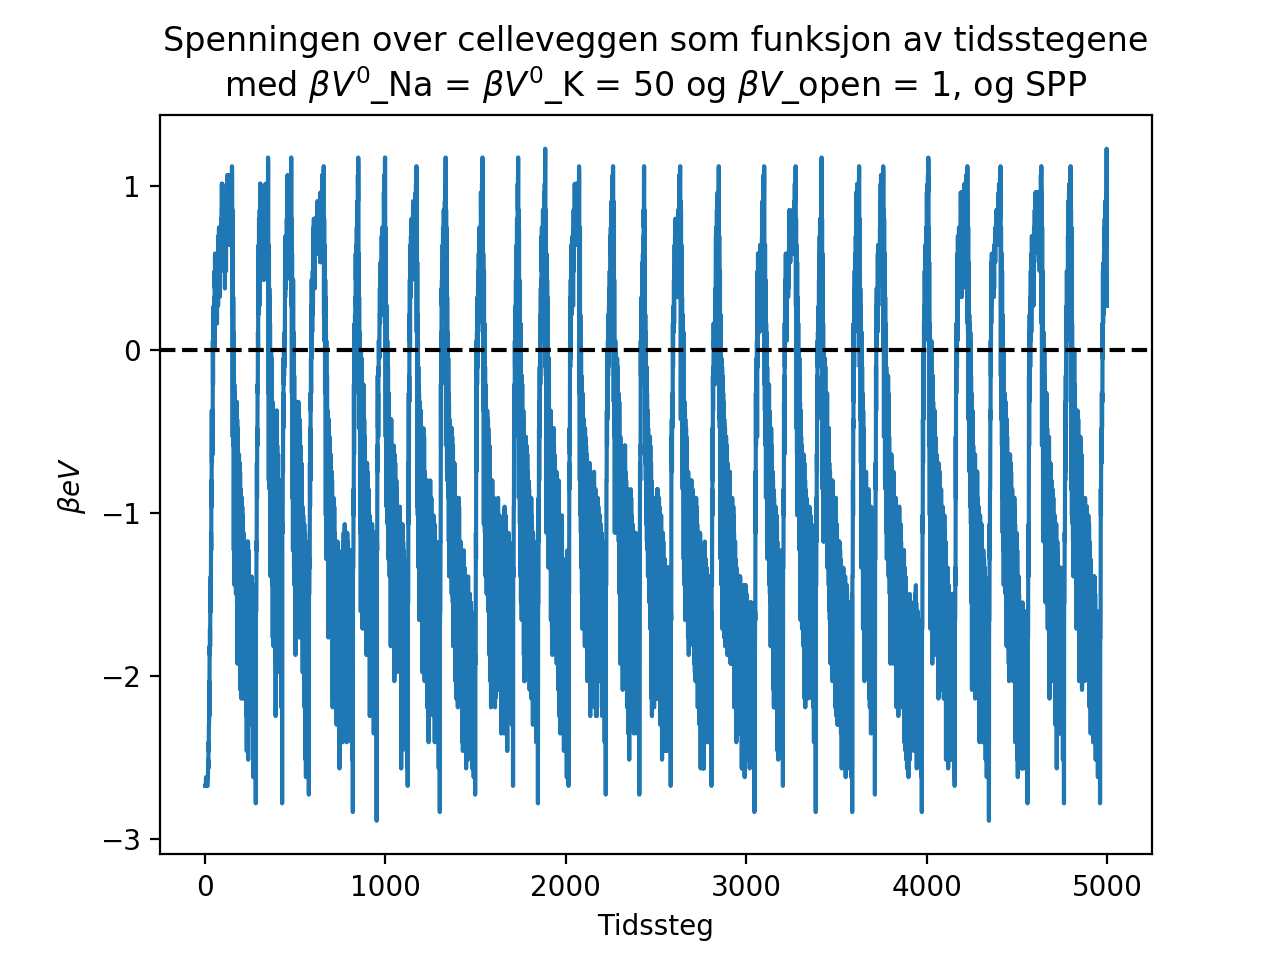

In [14]:
def sodium_potassium_pump(Na_list, K_list, h):
    Na_inside = np.count_nonzero(Na_list < -h)
    K_outside = np.count_nonzero(K_list > h)
    if Na_inside >= 3 and K_outside >= 2:
        Na_list.sort()
        K_list.sort()
        Na_index = np.argmax(Na_list > -2 * h)
        K_index = np.argmax(K_list > h)
        for i in range(3):
            Na_list[Na_index - i] = 2.5 * h
        for i in range(2):
            K_list[K_index + i] = -2.5 * h

def random_walk_accross_cell_membrane_3(V_Na_0=50, V_K_0=50, V_open=1, h=1, L=50, C_c=0.07, steps=5000,
                                        Na_outside_0=1450, Na_inside_0=50, K_outside_0=50, K_inside_0=1400):
    
    start_outside, start_inside = L / 4, -L / 4
    
    step_vals = np.arange(steps)
    
    Na_outside_list, K_outside_list = np.full(Na_outside_0, start_outside), np.full(K_outside_0, start_outside)
    K_inside_list, Na_inside_list = np.full(K_inside_0, start_inside), np.full(Na_inside_0, start_inside)
    
    Na_list = np.concatenate((Na_outside_list, Na_inside_list))
    K_list = np.concatenate((K_outside_list, K_inside_list))
    
    outside_consentration = (Na_outside_0 + K_outside_0) * 0.1e-3
    
    V = ((Na_inside_0 + K_inside_0) * 0.1e-3 - outside_consentration) / C_c
    V_list = np.zeros(steps)
    
    for i in range(steps):
        
        if i % 10 == 0:
            sodium_potassium_pump(Na_list, K_list, h)
        
        rand_Na = np.random.uniform(size=Na_list.size)
        rand_K = np.random.uniform(size=K_list.size)
        
        V_K_0, V_Na_0 = ion_gate(V, V_K_0, V_Na_0, V_open)
        
        Na_list = position_step(Na_list, V, V_Na_0, h, L)
        Na_inside = np.count_nonzero(Na_list < -h)
        
        K_list = position_step(K_list, V, V_K_0, h, L)
        K_inside = np.count_nonzero(K_list < -h)
        
        V = ((Na_inside + K_inside) - (Na_outside_0 + K_outside_0)) * 0.1e-3 * e * beta / C_c
        V_list[i] += V
        
    return V_list, step_vals
    
V_list, step_vals = random_walk_accross_cell_membrane_3()

plt.figure("Spenningen over celleveggen som funksjon av tidsstegene med pumpe")
plt.plot(step_vals, V_list)
plt.axhline(y=0, color='k', linestyle='--')
plt.title("Spenningen over celleveggen som funksjon av tidsstegene\
\nmed $βV^0$_Na = $βV^0$_K = {} og $βV$_open = {}, og SPP".format(50, 1))
plt.xlabel("Tidssteg")
plt.ylabel("$βeV$")
plt.show()

Fra figuren over ser vi nå at sykelen ser ut til å fortsette. Her har vi inkludert natrium-kalium-pumpen (SPP) som for hvert tiende tidssteg pumper ut tre $\text{Na}^+$-ioner av cellen og pumper inn to $\text{K}^+$-ioner i cellen. Dette er gitt at det er nok av de respektive ionene slik at det kan pumpes og vi ikke tilfører systemet nye partikler. SPP pumper de ionene som er nærmest cellemembranen og flytter de til motsatt side av cellemembranen.

Denne pumpingen fører til at det blir overført en ladning over cellemembranen, og denne hjelper med at $V(t)$ kan nå $-70\,\text{mV}$ slik at prosessen med ionekanalene starter igjen. Da kan en ny sykel som beskrevet i oppgave 8.1 skje, og slik vil prosessen gjenta seg. Det eneste kravet til at denne prosessen skal fortsette å skje, og vi får et såkalt aksjonspotensial er da at SPP fortsetter å pumpe, ellers vil vi få et avbrudd slik som i oppgave 8.1.

## Referanser

- [1] Rottmann, Karl. *Matematisk Formelsamling*. 16. opplag. Spektrum forlag.
- Prosjektbeskrivelsen tilgjengelig på BlackBoard.